In [1]:
# Import necessary classes
from utils.graphics.Image import Image
from utils.graphics.Point import Point
from digitization.Preprocessorv2 import Preprocessor 

In [2]:
import copy
import io
from os.path import splitext
from typing import Iterable, Sequence, Tuple
import cv2 as cv
import numpy as np
from pdf2image import convert_from_path
from pdf2image.exceptions import PDFPageCountError
from utils.graphics.ColorSpace import ColorSpace
from utils.graphics.Point import Point
from utils.graphics.Rectangle import Rectangle

class CustomImage:
    """
    A class that combines the functionalities of the original CustomImage and Image classes.
    """

    def __init__(self, array: np.ndarray = None, path: str = None) -> None:
        """
        Initialization of the image, either from an array or from a path.

        Args:
            array (np.ndarray): Numpy array containing the image data.
            path (str): Path to the image file.

        Raises:
            TypeError: If array is not a numpy array.
            FileNotFoundError: If the file does not exist.
        """
        self.__color_space = ColorSpace.BGR
        self.__data = None

        if array is not None:
            if isinstance(array, np.ndarray):
                self.__data = array
            else:
                raise TypeError("Expected a numpy.ndarray object")
        elif path is not None:
            _, file_extension = splitext(path)
            pdf_except = False
            if file_extension == ".pdf":
                try:
                    buffer = io.BytesIO()
                    pdf = convert_from_path(path)
                    pdf[0].save(buffer, format="png")
                    buffer.seek(0)
                    img_arr = np.frombuffer(buffer.getvalue(), dtype=np.uint8)
                    buffer.close()
                    self.__data = cv.imdecode(img_arr, cv.IMREAD_COLOR)
                except PDFPageCountError:
                    pdf_except = True
            else:
                self.__data = cv.imread(path)
            if self.__data is None or pdf_except:
                raise FileNotFoundError(f'File "{path}" does not exist')
        else:
            raise ValueError("Either array or path must be provided")

    def __getitem__(self, index: Sequence) -> Iterable[Iterable[int | Iterable[int]]]:
        return self.__data[index]

    def __setitem__(self, index: Sequence, value: Iterable[Iterable[int | Iterable[int]]]) -> None:
        self.__data[index] = value

    @property
    def data(self) -> Iterable[Iterable[int | Iterable[int]]]:
        return self.__data

    @data.setter
    def data(self, data: Iterable[Iterable[int | Iterable[int]]]) -> None:
        self.__data = data

    @property
    def height(self) -> int:
        return self.__data.shape[0]

    @property
    def width(self) -> int:
        return self.__data.shape[1]

    @property
    def white(self) -> int | Tuple[int, int, int]:
        if self.__color_space == ColorSpace.GRAY:
            return 255
        if self.__color_space == ColorSpace.HSV:
            return [0, 0, 255]
        return [255, 255, 255]

    @property
    def black(self) -> int | Tuple[int, int, int]:
        if self.__color_space == ColorSpace.GRAY:
            return 0
        return [0, 0, 0]
    

    @property
    def array(self):
        return self.data  # Assuming self.data is your image's numpy array.

    def copy(self) -> 'CustomImage':
        return copy.deepcopy(self)

    def save(self, path: str) -> None:
        self.to_BGR()
        cv.imwrite(path, self.__data)

    def crop(self, r: Rectangle) -> None:
        tl = r.top_left
        br = r.bottom_right
        self.__data = self.__data[tl.y : br.y, tl.x : br.x]

    def threshold(self, thres: int, value: int) -> None:
        _, self.__data = cv.threshold(self.__data, thres, value, cv.THRESH_BINARY)
        self.to_GRAY()

    def line(self, p1: Point, p2: Point, color: Tuple[int, int, int], thickness: int):
        cv.line(self.__data, (p1.x, p1.y), (p2.x, p2.y), color, thickness=thickness)

    def is_GRAY(self) -> bool:
        return self.__color_space == ColorSpace.GRAY

    def is_BGR(self) -> bool:
        return self.__color_space == ColorSpace.BGR

    def is_RGB(self) -> bool:
        return self.__color_space == ColorSpace.RGB

    def is_HSV(self) -> bool:
        return self.__color_space == ColorSpace.HSV

    def to_GRAY(self) -> None:
        if self.is_RGB():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_RGB2GRAY)
        elif self.is_BGR():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_BGR2GRAY)
        elif self.is_HSV():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_HSV2GRAY)
        self.__color_space = ColorSpace.GRAY

    def to_BGR(self) -> None:
        if self.is_GRAY():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_GRAY2BGR)
        elif self.is_RGB():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_RGB2BGR)
        elif self.is_HSV():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_HSV2BGR)
        self.__color_space = ColorSpace.BGR

    def to_RGB(self) -> None:
        if self.is_GRAY():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_GRAY2RGB)
        elif self.is_BGR():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_BGR2RGB)
        elif self.is_HSV():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_HSV2RGB)
        self.__color_space = ColorSpace.RGB

    def to_HSV(self) -> None:
        if self.is_GRAY():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_GRAY2HSV)
        elif self.is_BGR():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_BGR2HSV)
        elif self.is_RGB():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_RGB2HSV)
        self.__color_space = ColorSpace.HSV


## Single file test: padding + GMM + R peak + plot as many as aligned

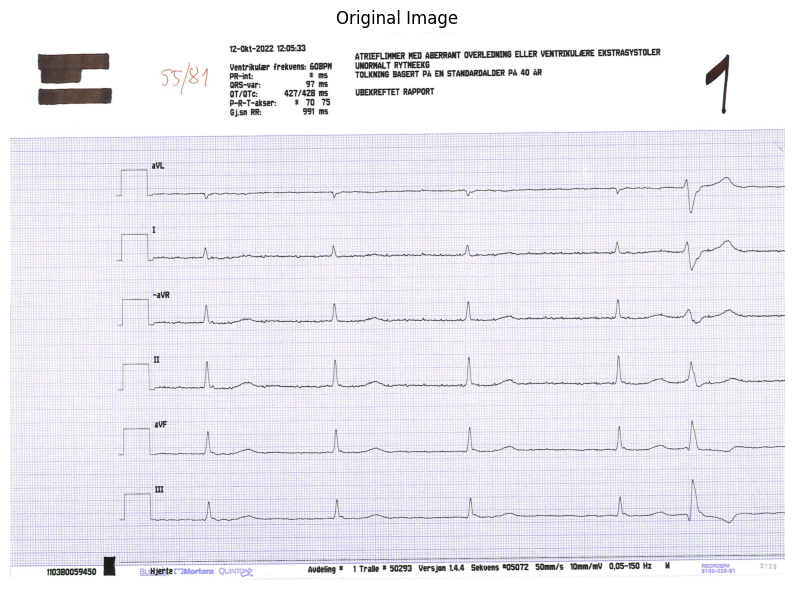

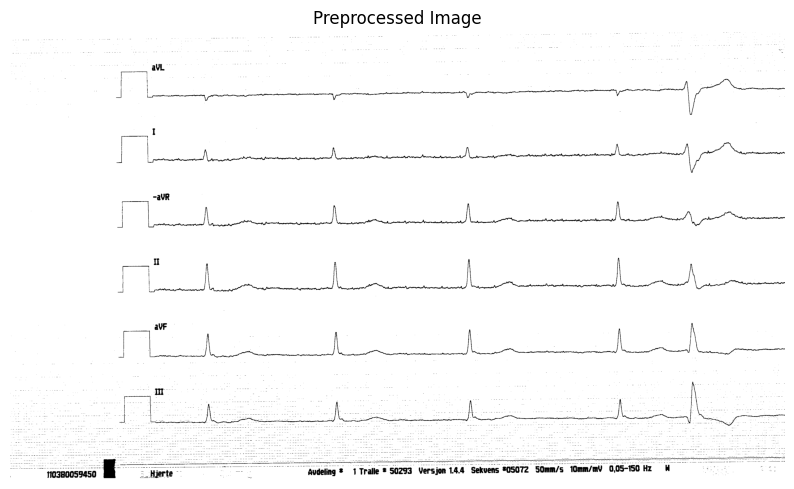

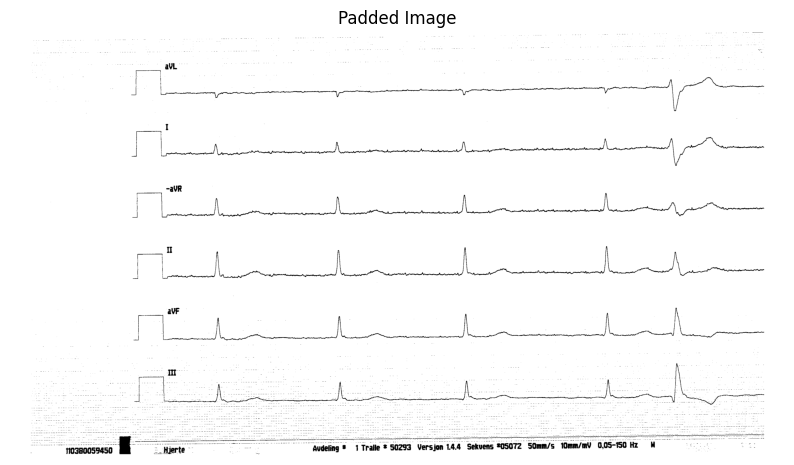

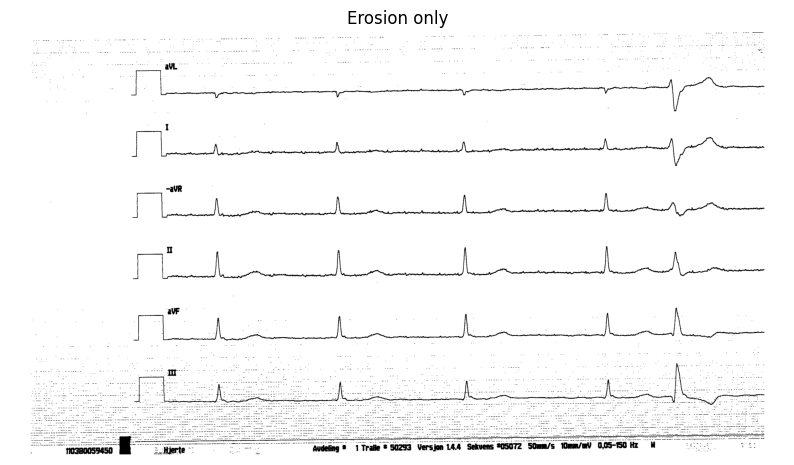

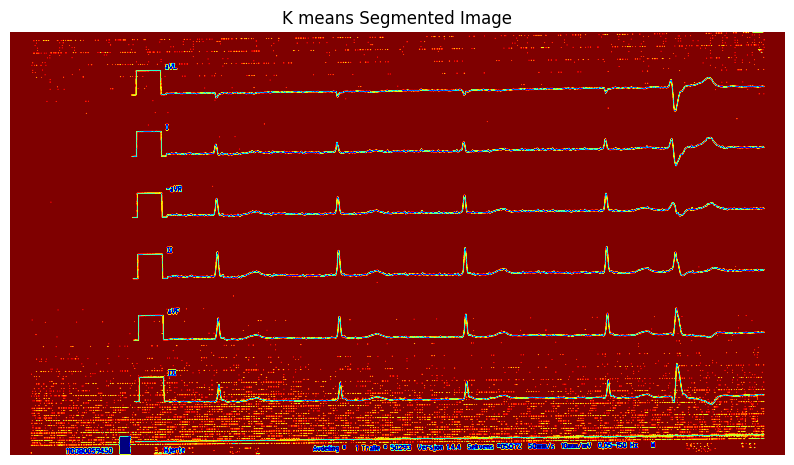

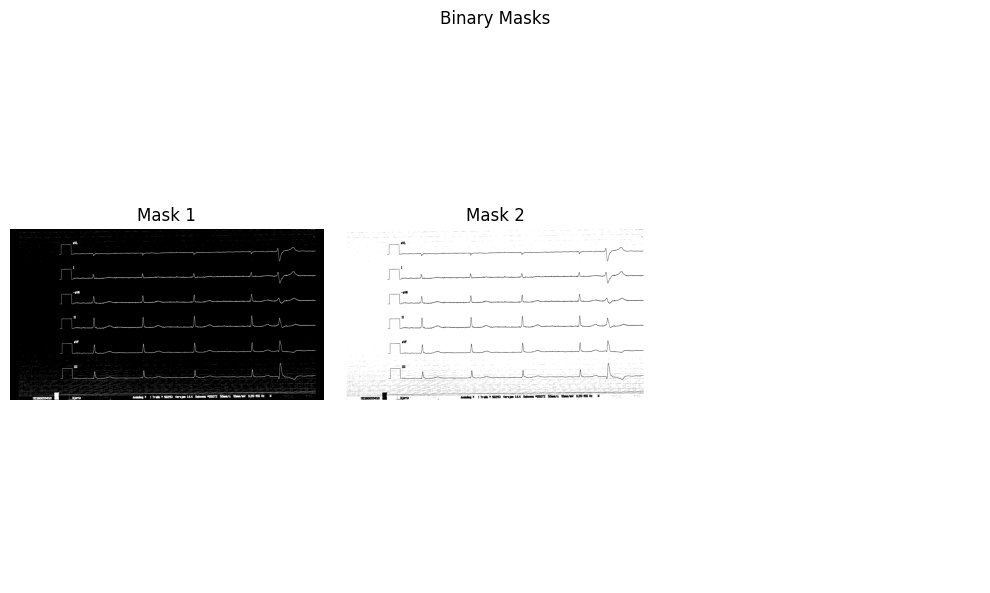

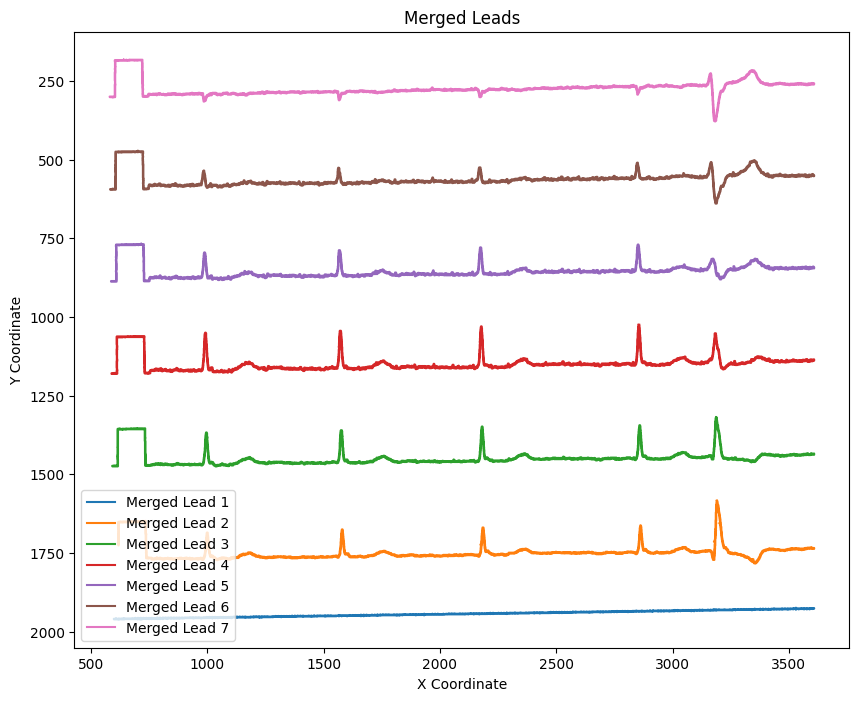

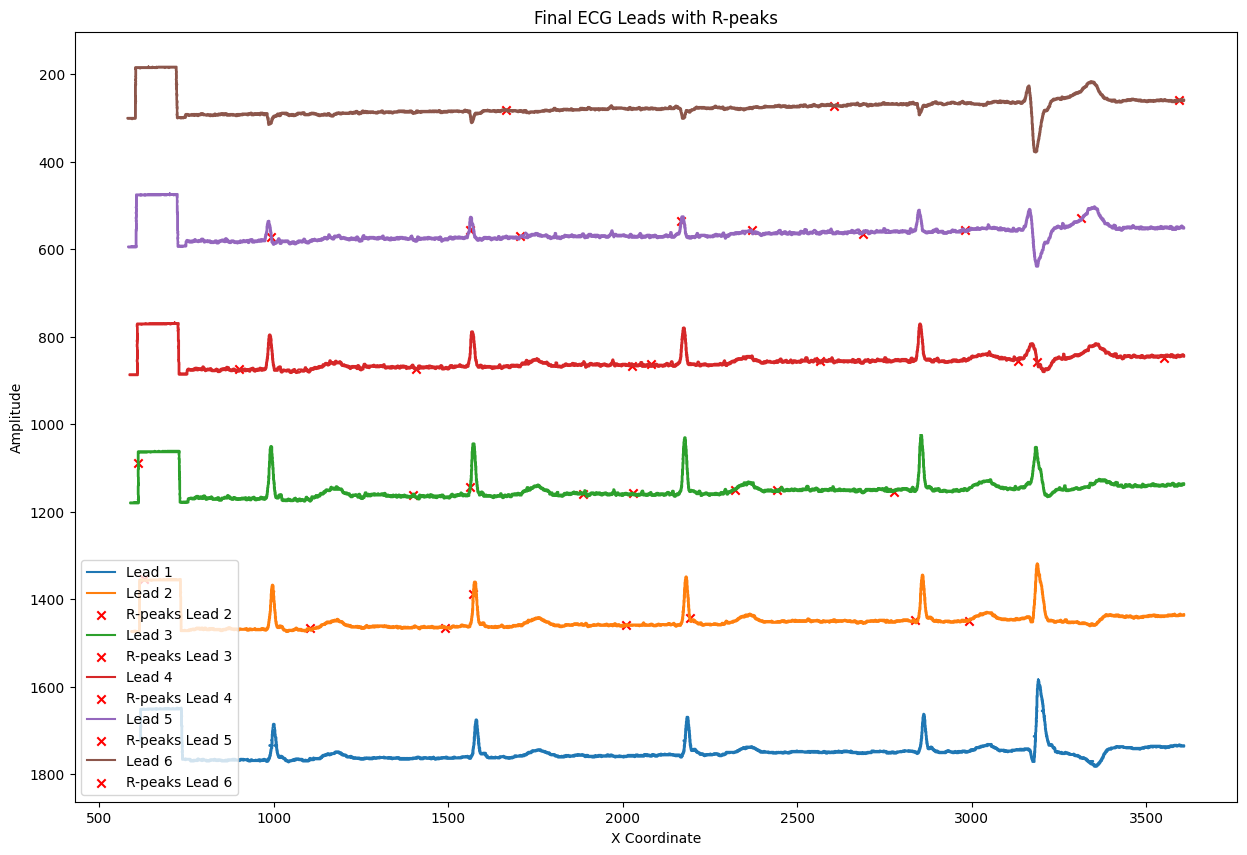

d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


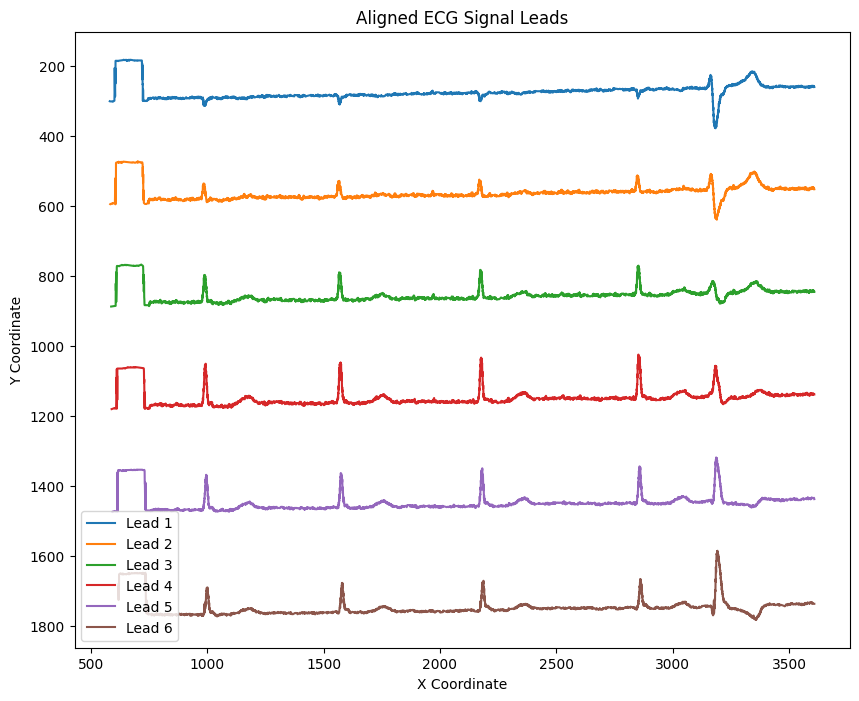

Time and amplitude values have been saved to ecg_time_amplitude.csv
Amplitude values have been saved to ecg_leads.csv


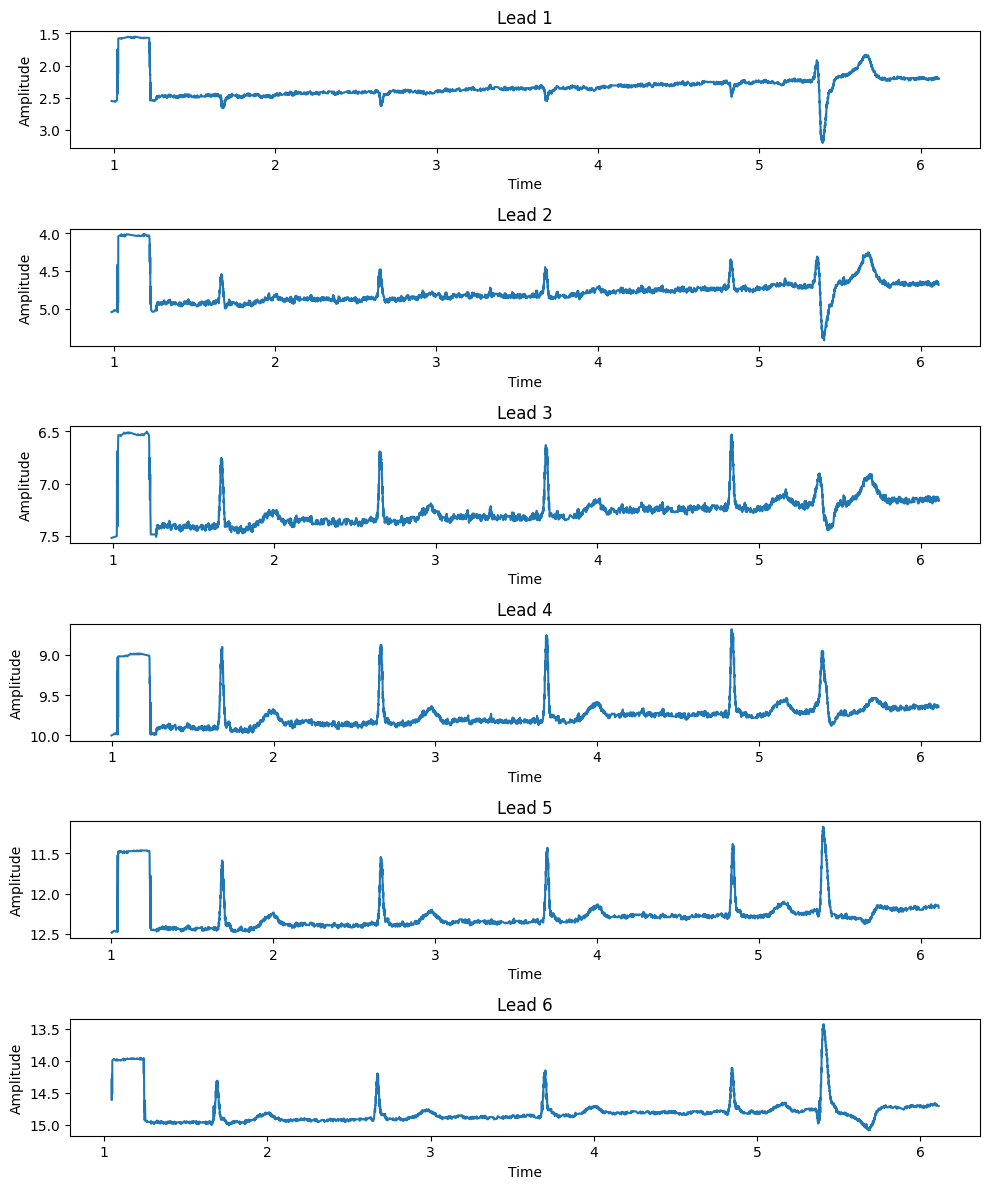

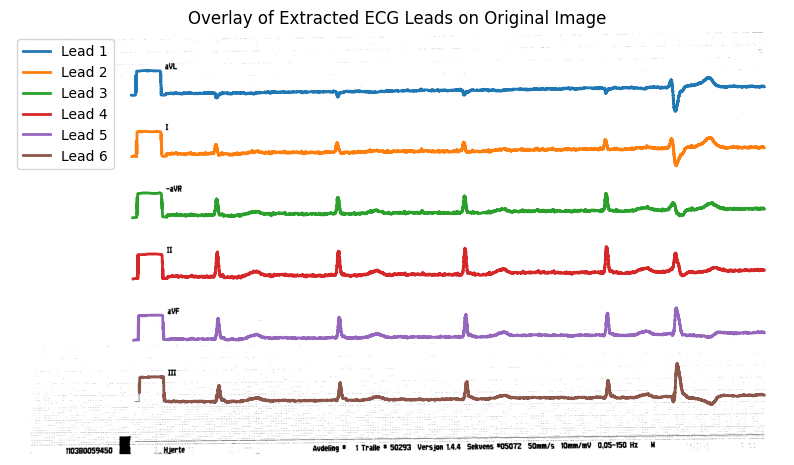

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd
import sys
from scipy import ndimage  # Make sure to import ndimage for `find_objects`
from sklearn.linear_model import LinearRegression

# Helper function to plot images
def plot_image(image, title, cmap='gray'):
    plt.figure(figsize=(10, 8))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()



def align_leads(contour_coords, num_points=5000):
    aligned_coords = []
    for coords in contour_coords:
        x = coords[:, 0]
        y = coords[:, 1]
        f_interp = interp1d(x, y, kind='linear', fill_value="extrapolate")
        x_new = np.linspace(x.min(), x.max(), num_points)
        y_new = f_interp(x_new)
        aligned_coords.append(np.column_stack((x_new, y_new)))
    return aligned_coords





def plot_aligned_coordinates(aligned_coords):
    plt.figure(figsize=(10, 8))
    
    # Reverse the order of aligned leads to match top-to-bottom ordering
    for i, coords in enumerate(reversed(aligned_coords)):
        plt.plot(coords[:, 0], coords[:, 1], label=f'Lead {i+1}')
    
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.title('Aligned ECG Signal Leads')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()


def apply_kmeans(image, n_clusters=2):
    Z = image.reshape((-1, 1))  # Flatten the image
    Z = np.float32(Z)
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv.kmeans(Z, n_clusters, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
    segmented_image = labels.reshape((image.shape))
    return segmented_image, centers

from sklearn.mixture import GaussianMixture

def apply_gmm(image, n_components=2):
    Z = image.reshape((-1, 1))
    Z = np.float32(Z)

    gmm = GaussianMixture(n_components=n_components, covariance_type='tied')
    gmm.fit(Z)
    labels = gmm.predict(Z)
    
    segmented_image = labels.reshape(image.shape)
    return segmented_image, gmm.means_




def create_binary_masks(segmented_image, n_clusters):
    binary_masks = [(segmented_image == i).astype(np.uint8) * 255 for i in range(n_clusters)]
    return binary_masks

def extract_contour_coordinates(binary_masks):
    contour_coordinates = []
    for mask in binary_masks:
        contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            coords = contour[:, 0, :]  # Extract x and y coordinates
            contour_coordinates.append(coords)
    return contour_coordinates

def resample_contour(contour, num_points=100):
    x = contour[:, 0]
    y = contour[:, 1]
    f_interp = interp1d(np.arange(len(x)), x, kind='linear', fill_value="extrapolate")
    x_new = np.linspace(0, len(x) - 1, num_points)
    x_resampled = f_interp(x_new)
    f_interp = interp1d(np.arange(len(y)), y, kind='linear', fill_value="extrapolate")
    y_resampled = f_interp(x_new)
    return np.column_stack((x_resampled, y_resampled))

def calculate_gradient(coords):
    # Fit a linear regression to the x and y coordinates to find the slope (gradient)
    X = coords[:, 0].reshape(-1, 1)  # x-coordinates
    y = coords[:, 1]  # y-coordinates
    model = LinearRegression().fit(X, y)
    slope = model.coef_[0]  # The gradient of the line (dy/dx)
    return slope

def filter_and_merge_leads(contour_coords, min_size=1000, y_threshold=30, gradient_threshold=0.05):
    # Filter out small contours
    large_contours = [coords for coords in contour_coords if len(coords) > min_size]

    merged_leads = []
    current_lead = []
    
    for i, coords in enumerate(large_contours):
        if not current_lead:
            current_lead.append(coords)
            continue

        # Calculate the gradient for the current contour and the first contour in the current lead
        current_gradient = calculate_gradient(coords)
        lead_gradient = calculate_gradient(current_lead[0])

        # Check if the y-values are similar and gradients are similar enough to merge
        if (np.abs(coords[:, 1].mean() - current_lead[0][:, 1].mean()) < y_threshold and
            np.abs(current_gradient - lead_gradient) < gradient_threshold):
            current_lead.append(coords)
        else:
            # Merge the current lead
            merged_leads.append(np.vstack(current_lead))
            current_lead = [coords]

    # Add the last lead
    if current_lead:
        merged_leads.append(np.vstack(current_lead))

    return merged_leads

def plot_time_amplitude_single_column(time_amplitude_df):
    """
    Plots each lead's time-amplitude in a single column layout.
    
    :param time_amplitude_df: DataFrame containing time and amplitude columns for the leads.
    """
    # Dynamically determine the number of leads from the DataFrame columns
    lead_columns = [col for col in time_amplitude_df.columns if '_time' in col]
    num_leads = len(lead_columns)

    plt.figure(figsize=(10, num_leads * 2))

    # Iterate over the leads and plot only the ones that are present in time_amplitude_df
    for i in range(1, num_leads + 1):
        time_col = f'Lead_{i}_time'
        amp_col = f'Lead_{i}_amplitude'

        # Only plot if both time and amplitude columns exist in the DataFrame
        if time_col in time_amplitude_df.columns and amp_col in time_amplitude_df.columns:
            plt.subplot(num_leads, 1, i)
            plt.plot(time_amplitude_df[time_col], time_amplitude_df[amp_col])
            plt.title(f'Lead {i}')
            plt.xlabel('Time')
            plt.ylabel('Amplitude')
            plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
        else:
            print(f"Skipping Lead {i} as it's missing in the DataFrame")

    plt.tight_layout()
    plt.show()


def plot_time_amplitude_overlay(image_path, time_amplitude_df, pixels_per_mm_x, pixels_per_mm_y):
    """
    Plots the ECG leads overlaying on the original ECG image.

    :param image_path: The path to the original ECG image or the image matrix.
    :param time_amplitude_df: DataFrame containing the time and amplitude for each lead.
    :param pixels_per_mm_x: The pixel-to-mm conversion factor for the x-axis (time).
    :param pixels_per_mm_y: The pixel-to-mm conversion factor for the y-axis (amplitude).
    """

    plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

    # Plot the original ECG image
    plt.imshow(image_path, cmap='gray')

    # Conversion factors (inverse of what was used to convert from pixels to time/amplitude)
    pixel_per_time = pixels_per_mm_x * 50  # 50 mm = 1 second
    pixel_per_amplitude = pixels_per_mm_y * 10  # 10 mm = 1 mV

    # Dynamically determine the number of leads from the DataFrame columns
    lead_columns = [col for col in time_amplitude_df.columns if '_time' in col]
    num_leads = len(lead_columns)

    # Overlay each lead present in time_amplitude_df
    for i in range(1, num_leads + 1):
        time_col = f'Lead_{i}_time'
        amp_col = f'Lead_{i}_amplitude'
        
        if time_col in time_amplitude_df.columns and amp_col in time_amplitude_df.columns:
            # Convert time and amplitude back to pixel coordinates
            x_pixels = time_amplitude_df[time_col] * pixel_per_time
            y_pixels = time_amplitude_df[amp_col] * pixel_per_amplitude

            plt.plot(x_pixels, y_pixels, label=f'Lead {i}', linewidth=2)  # Plot each lead
        else:
            print(f"Skipping Lead {i} as it's missing in the DataFrame")

    plt.title('Overlay of Extracted ECG Leads on Original Image')
    plt.xlabel('Time (pixels)')
    plt.ylabel('Amplitude (pixels)')
    plt.legend()
    plt.axis('off')  # Hide axis since we're overlaying on an image
    plt.show()



# Function to extract time and amplitude from aligned leads
def extract_time_amplitude(aligned_leads, pixels_per_mm_x, pixels_per_mm_y):
    lead_data = {}

    # Conversion factors
    time_per_pixel = 1 / (pixels_per_mm_x * 50)  # 50 mm = 1 second
    amplitude_per_pixel = 1 / (pixels_per_mm_y * 10)  # 10 mm = 1 mV

    # Reverse the order of aligned leads to match top-to-bottom ordering
    aligned_leads = list(reversed(aligned_leads))

    for i, lead in enumerate(aligned_leads):
        time_values = lead[:, 0] * time_per_pixel  # Convert x-coordinates to time
        amplitude_values = lead[:, 1] * amplitude_per_pixel  # Convert y-coordinates to amplitude
        lead_data[f'Lead_{i+1}_time'] = time_values
        lead_data[f'Lead_{i+1}_amplitude'] = amplitude_values
    
    return pd.DataFrame(lead_data)



def plot_binary_masks(binary_masks):
    num_masks = len(binary_masks)
    cols = 3
    rows = (num_masks + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(10, 6))
    axes = axes.flatten()

    plt.suptitle('Binary Masks')
    
    for i, mask in enumerate(binary_masks):
        axes[i].imshow(mask, cmap='gray')
        axes[i].set_title(f'Mask {i+1}')
        axes[i].axis('off')

    for j in range(num_masks, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

def plot_merged_leads(merged_leads):
    plt.figure(figsize=(10, 8))
    plt.title('Merged Leads')

    for i, coords in enumerate(merged_leads):
        plt.plot(coords[:, 0], coords[:, 1], label=f'Merged Lead {i+1}')
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()

def plot_final_leads(final_leads, r_peaks_list):
    plt.figure(figsize=(15, 10))
    
    for i, (lead, r_peaks) in enumerate(zip(final_leads, r_peaks_list)):
        plt.plot(lead[:, 0], lead[:, 1], label=f'Lead {i+1}')
        
        if r_peaks is not None and len(r_peaks) > 0:
            # Ensure indices are within bounds
            valid_indices = np.clip(r_peaks.astype(int), 0, len(lead) - 1)
            r_peak_amplitudes = lead[valid_indices, 1]
            plt.scatter(lead[valid_indices, 0], r_peak_amplitudes, color='red', label=f'R-peaks Lead {i+1}', marker='x')
    
    plt.xlabel('X Coordinate')
    plt.ylabel('Amplitude')
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.title('Final ECG Leads with R-peaks')
    plt.legend()
    plt.show()


    

import neurokit2 as nk

def filter_leads_with_r_peaks(merged_leads, sampling_rate=500):
    final_leads = []
    r_peaks_list = []  # List to store R-peaks for each lead

    for lead in merged_leads:
        # Extract the y-coordinates (amplitude) of the lead
        amplitude_values = lead[:, 1]

        # Detect R-peaks using NeuroKit's `ecg_peaks` function
        try:
            _, rpeaks = nk.ecg_peaks(amplitude_values, sampling_rate=sampling_rate)

            # If more than one R-peak is detected, consider this lead
            if len(rpeaks['ECG_R_Peaks']) > 1:
                final_leads.append(lead)
                r_peaks_list.append(rpeaks['ECG_R_Peaks'])
            else:
                r_peaks_list.append(None)
        except Exception as e:
            print(f"R-peak detection failed for one lead: {e}")
            r_peaks_list.append(None)

    return final_leads, r_peaks_list

# Main processing function
def process_ecg_image(image_path, padding_size=100):
    # Step 1: Load the image
    image = cv.imread(image_path)
    if image is None:
        print('Cannot open image: ' + image_path)
        sys.exit(0)

    plot_image(image, 'Original Image')

    # Convert the image to a custom Image class
    img_obj = CustomImage(image)

    # Initialize Preprocessor
    preprocessor = Preprocessor()

    # Apply preprocessing
    preprocessed_img_obj, rect = preprocessor.preprocess(img_obj)
    
    # Convert the preprocessed image back to numpy array
    preprocessed_image = preprocessed_img_obj.array

    # Plot the preprocessed image
    plot_image(preprocessed_image, 'Preprocessed Image')

    # Add padding to the left and right of the preprocessed image
    padded_image = cv.copyMakeBorder(
        preprocessed_image, 
        top=0, bottom=0, left=padding_size, right=padding_size, 
        borderType=cv.BORDER_CONSTANT, value=255  # Assuming the background is white (255)
    )
    
    # Plot the padded image
    plot_image(padded_image, 'Padded Image')
    
    # ############################################
    # Define kernel
    kernel = np.ones((2, 2), np.uint8)

    # Erosion and Dilation
    img_erosion = cv.erode(padded_image, kernel, iterations=1)    
    plot_image(img_erosion, 'Erosion only')

    # Apply GMM segmentation on the padded image
    # segmented_image, centers = apply_gmm(padded_image, n_components=2)
    segmented_image, centers = apply_kmeans(img_erosion, n_clusters=2)
    # plot_image(segmented_image, "Segmented Image (GMM)", cmap='jet')
    plot_image(segmented_image, "K means Segmented Image", cmap='jet')


    # Create binary masks and extract contours
    binary_masks = create_binary_masks(segmented_image, n_clusters=2)
    plot_binary_masks(binary_masks)  # Plot binary masks
    
    contour_coords = extract_contour_coordinates(binary_masks)
    
    # Filter, merge, and align leads
    merged_leads = filter_and_merge_leads(contour_coords)
    plot_merged_leads(merged_leads)  # Plot merged leads

    # Detect R-peaks in each merged lead and filter leads with R-peaks
    final_leads, r_peaks_list = filter_leads_with_r_peaks(merged_leads)
    plot_final_leads(final_leads, r_peaks_list)  # Plot final leads with R-peaks

    # Align leads and sort them from top to bottom
    aligned_leads = align_leads(final_leads, num_points=5000)

    # Plot the aligned ECG leads
    plot_aligned_coordinates(aligned_leads)

    # Example usage with calculated pixel scaling factors
    pixels_per_mm_x = 11.81
    pixels_per_mm_y = 11.81

    # Extract time and amplitude values for each lead
    time_amplitude_df = extract_time_amplitude(aligned_leads, pixels_per_mm_x, pixels_per_mm_y)
    output_csv_path = 'ecg_time_amplitude.csv'
    time_amplitude_df.to_csv(output_csv_path, index=False)
    print(f"Time and amplitude values have been saved to {output_csv_path}")

    amplitude_df = time_amplitude_df.filter(like='_amplitude')
    amplitude_csv_path = 'ecg_leads.csv'
    amplitude_df.to_csv(amplitude_csv_path, index=False, header=True)
    print(f"Amplitude values have been saved to {amplitude_csv_path}")

    # Plot each lead's time vs. amplitude with 6 rows and 1 column
    plot_time_amplitude_single_column(time_amplitude_df)
    plot_time_amplitude_overlay(padded_image, time_amplitude_df, pixels_per_mm_x, pixels_per_mm_y)

    return aligned_leads, time_amplitude_df



# Example usage
image_path = r'../rotated_data_png/1_F_page_1.png'

aligned_leads, time_amplitude_df = process_ecg_image(image_path)





## New test with image_to_sequence

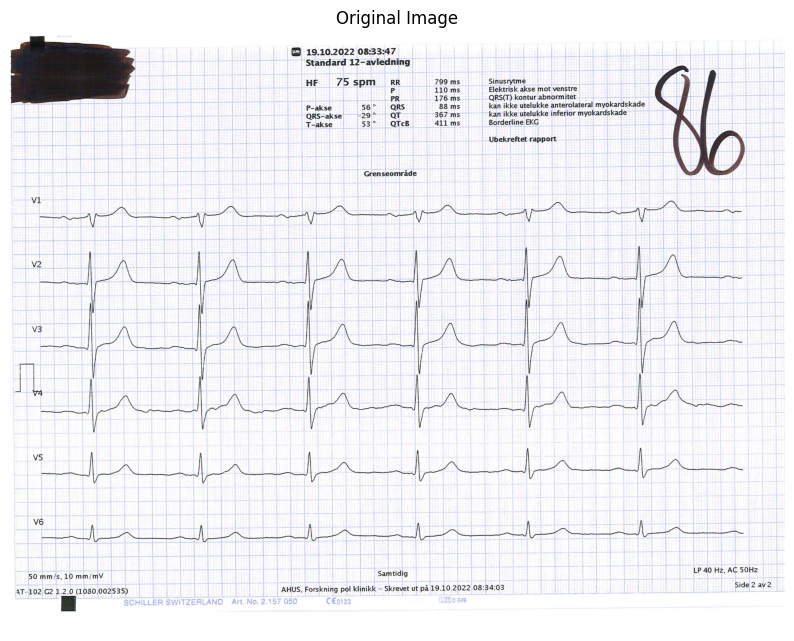

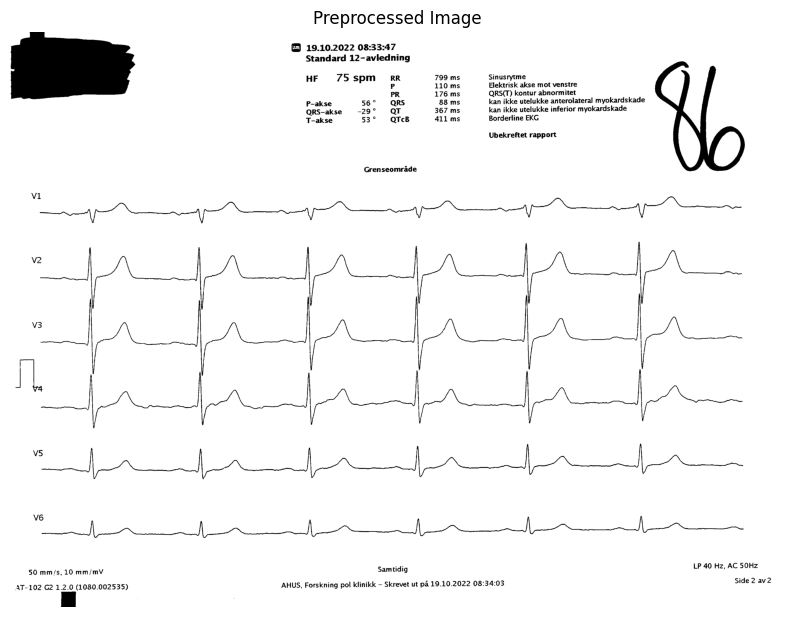

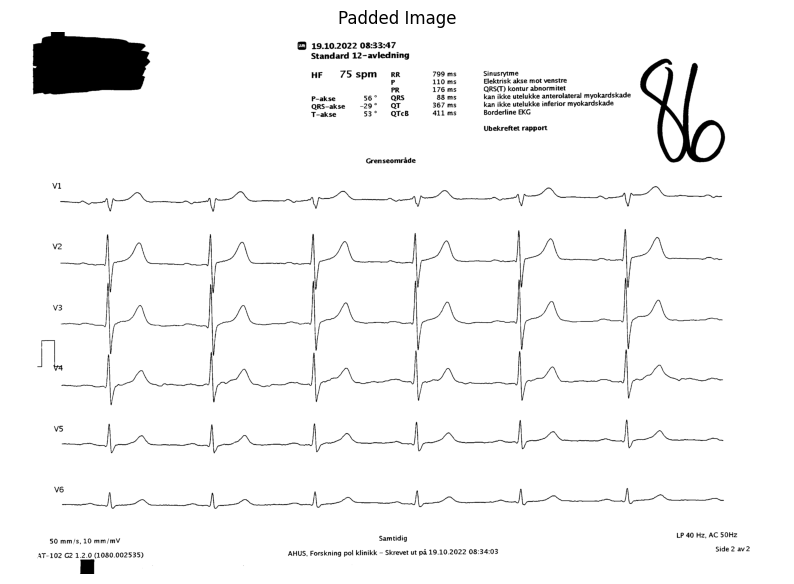

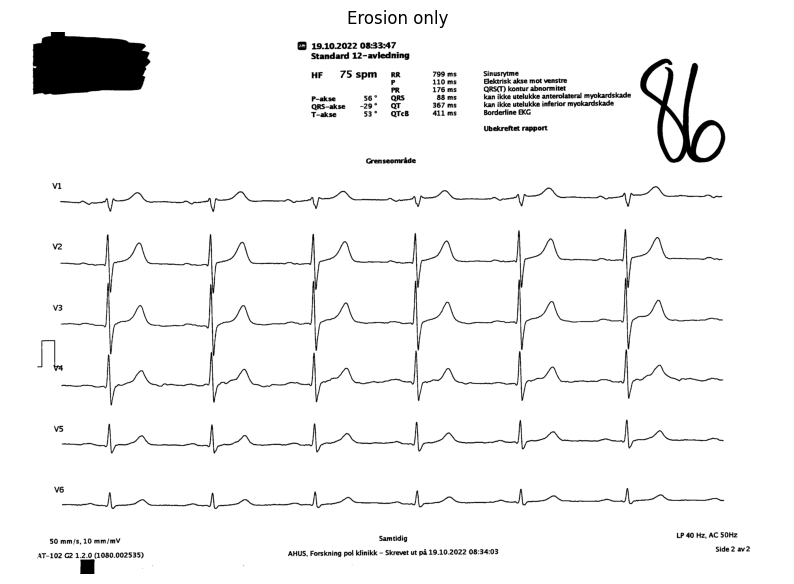

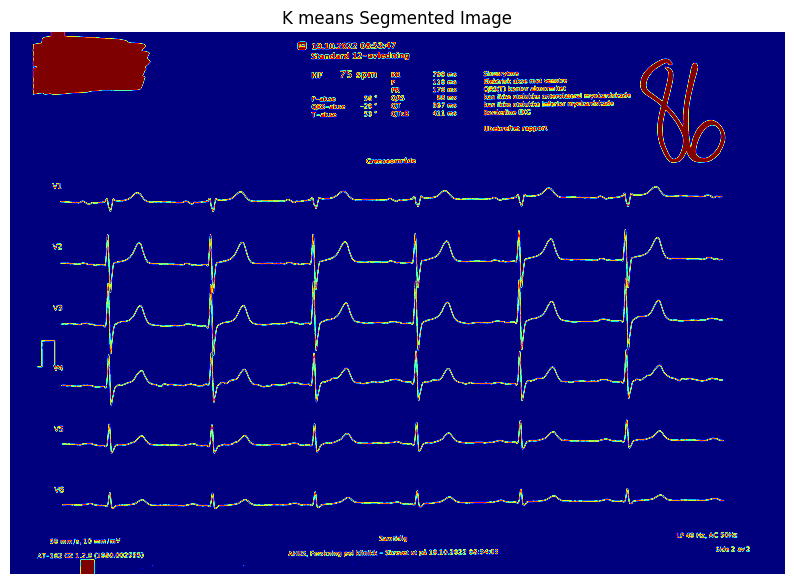

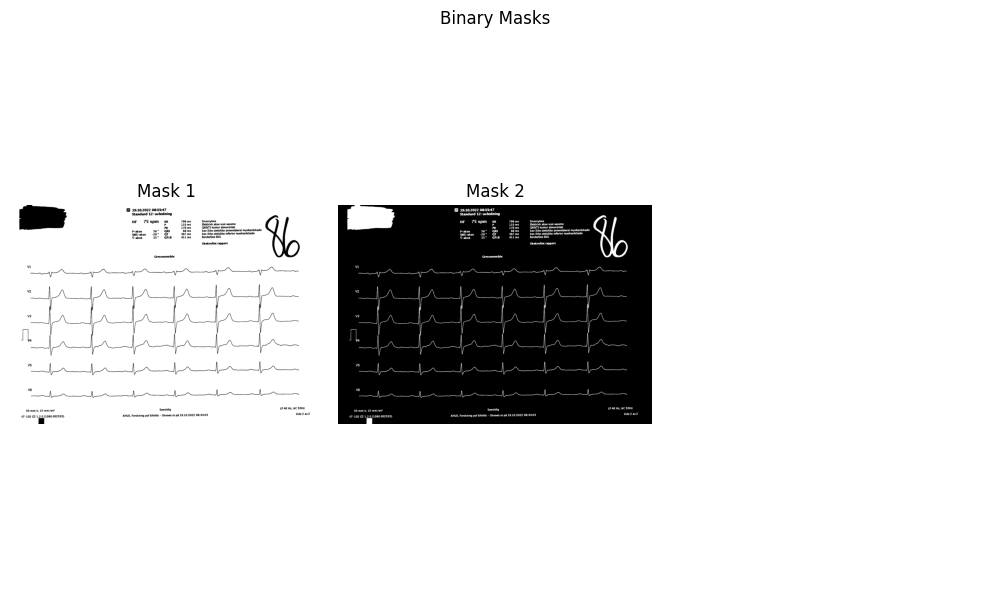

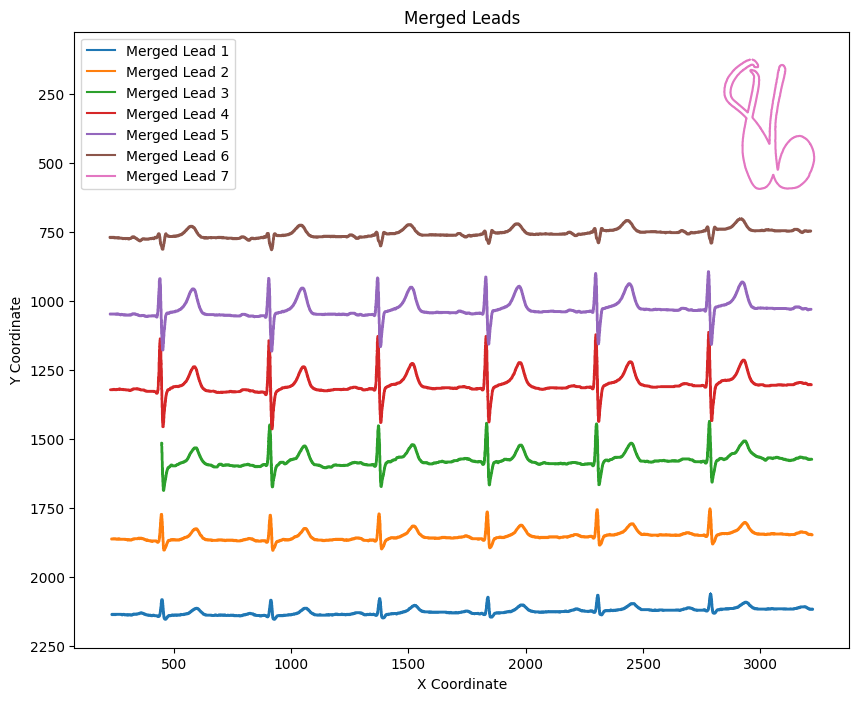

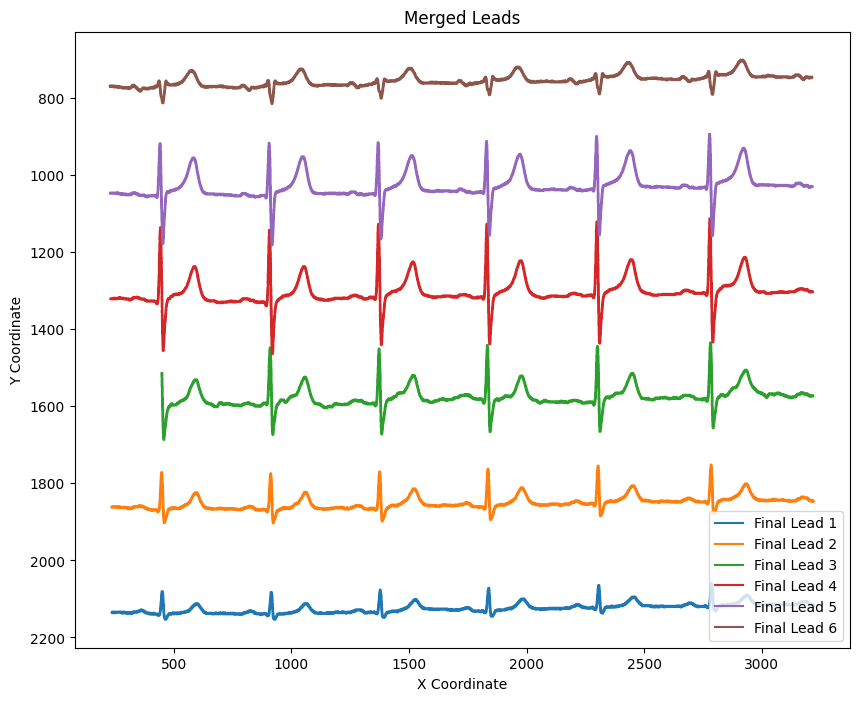

d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


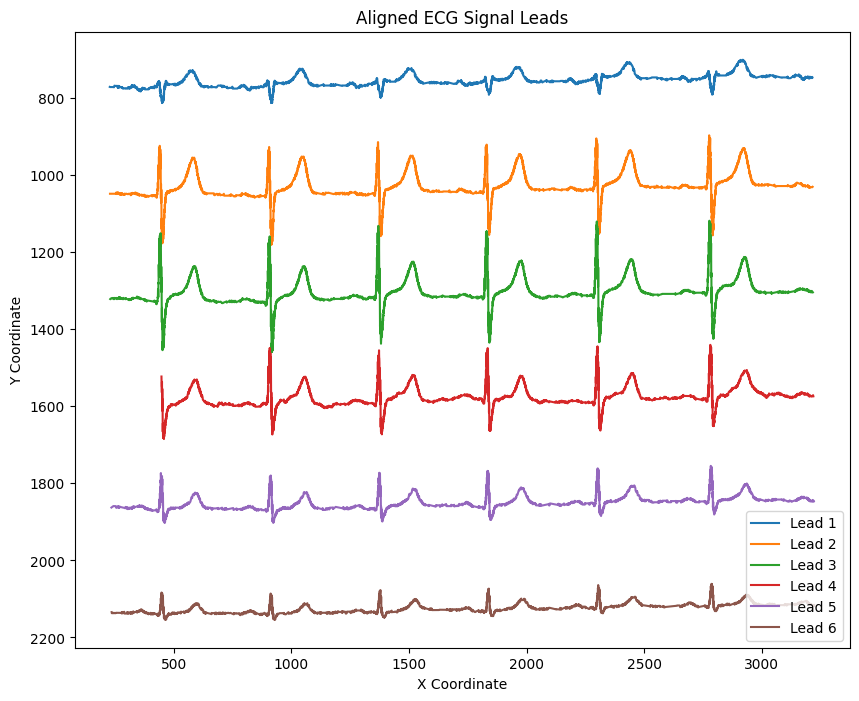

Time and amplitude values have been saved to ecg_time_amplitude.csv
Amplitude values have been saved to ecg_leads.csv


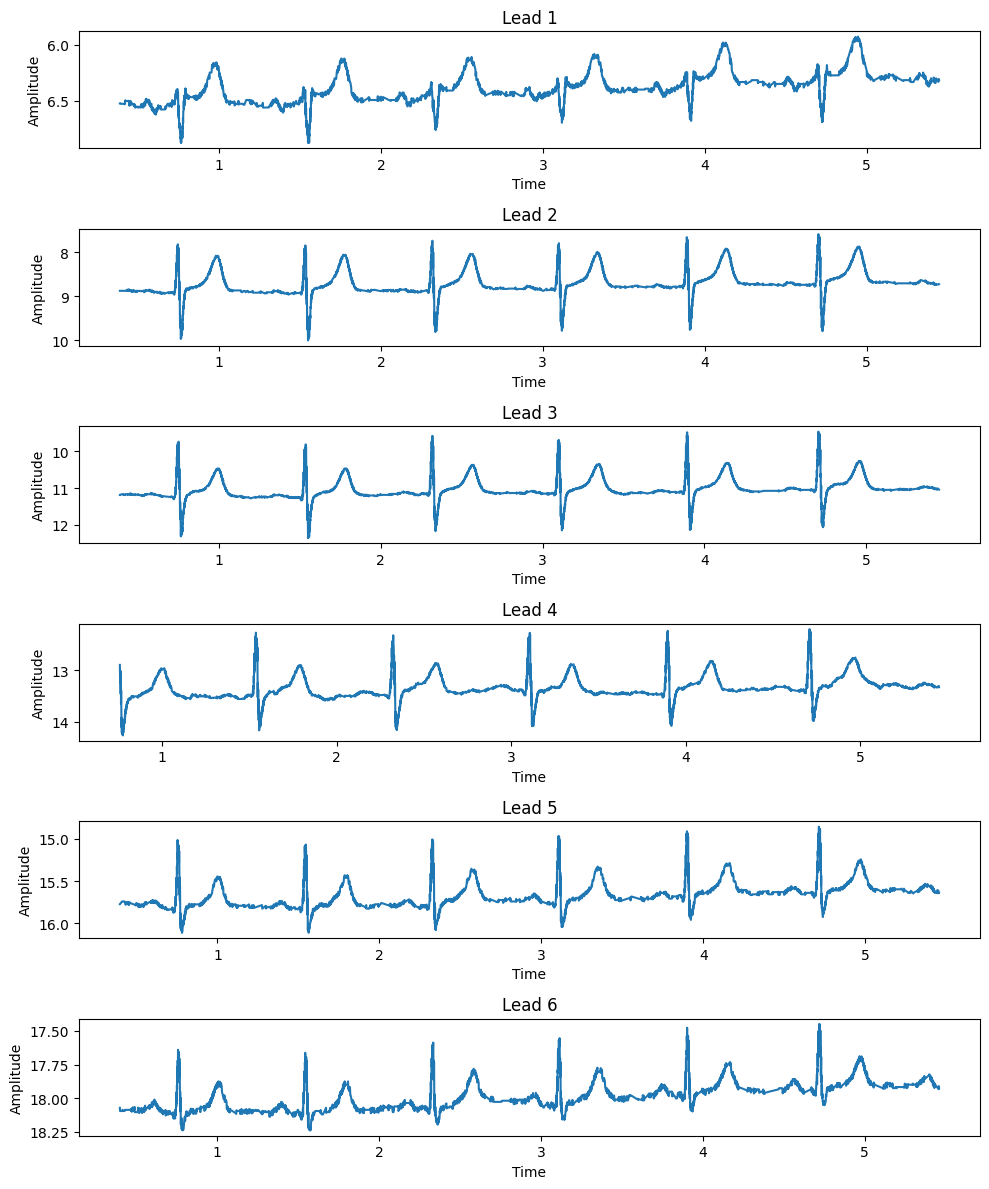

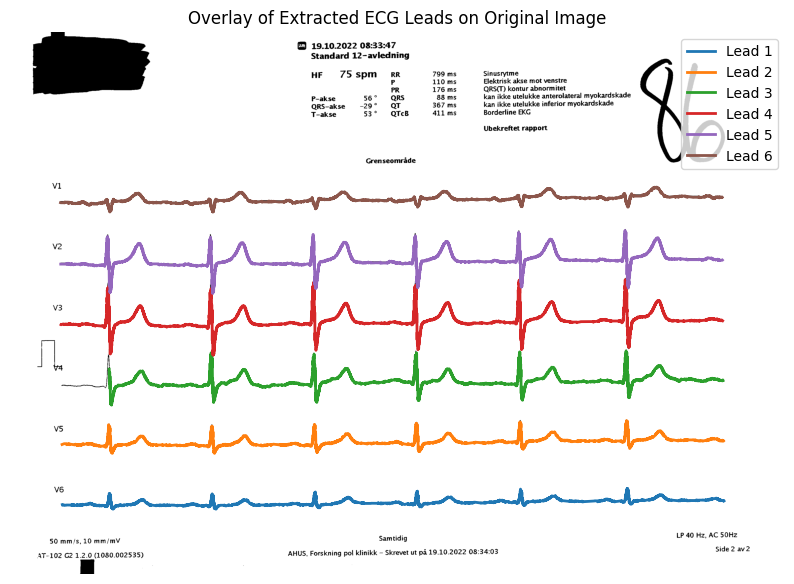

In [38]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd
import sys
from scipy import ndimage  # Make sure to import ndimage for `find_objects`
from sklearn.linear_model import LinearRegression

# Helper function to plot images
def plot_image(image, title, cmap='gray'):
    plt.figure(figsize=(10, 8))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()



def align_leads(contour_coords, num_points=5000):
    aligned_coords = []
    for coords in contour_coords:
        x = coords[:, 0]
        y = coords[:, 1]
        f_interp = interp1d(x, y, kind='linear', fill_value="extrapolate")
        x_new = np.linspace(x.min(), x.max(), num_points)
        y_new = f_interp(x_new)
        aligned_coords.append(np.column_stack((x_new, y_new)))
    return aligned_coords





def plot_aligned_coordinates(aligned_coords):
    plt.figure(figsize=(10, 8))
    
    # Reverse the order of aligned leads to match top-to-bottom ordering
    for i, coords in enumerate(reversed(aligned_coords)):
        plt.plot(coords[:, 0], coords[:, 1], label=f'Lead {i+1}')
    
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.title('Aligned ECG Signal Leads')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()


def apply_kmeans(image, n_clusters=2):
    Z = image.reshape((-1, 1))  # Flatten the image
    Z = np.float32(Z)
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv.kmeans(Z, n_clusters, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
    segmented_image = labels.reshape((image.shape))
    return segmented_image, centers

from sklearn.mixture import GaussianMixture

def apply_gmm(image, n_components=2):
    Z = image.reshape((-1, 1))
    Z = np.float32(Z)

    gmm = GaussianMixture(n_components=n_components, covariance_type='tied')
    gmm.fit(Z)
    labels = gmm.predict(Z)
    
    segmented_image = labels.reshape(image.shape)
    return segmented_image, gmm.means_




def create_binary_masks(segmented_image, n_clusters):
    binary_masks = [(segmented_image == i).astype(np.uint8) * 255 for i in range(n_clusters)]
    return binary_masks

def extract_contour_coordinates(binary_masks):
    contour_coordinates = []
    for mask in binary_masks:
        contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            coords = contour[:, 0, :]  # Extract x and y coordinates
            contour_coordinates.append(coords)
    return contour_coordinates

def resample_contour(contour, num_points=100):
    x = contour[:, 0]
    y = contour[:, 1]
    f_interp = interp1d(np.arange(len(x)), x, kind='linear', fill_value="extrapolate")
    x_new = np.linspace(0, len(x) - 1, num_points)
    x_resampled = f_interp(x_new)
    f_interp = interp1d(np.arange(len(y)), y, kind='linear', fill_value="extrapolate")
    y_resampled = f_interp(x_new)
    return np.column_stack((x_resampled, y_resampled))

def calculate_gradient(coords):
    # Fit a linear regression to the x and y coordinates to find the slope (gradient)
    X = coords[:, 0].reshape(-1, 1)  # x-coordinates
    y = coords[:, 1]  # y-coordinates
    model = LinearRegression().fit(X, y)
    slope = model.coef_[0]  # The gradient of the line (dy/dx)
    return slope

def filter_and_merge_leads(contour_coords, min_size=1000, y_threshold=30, gradient_threshold=0.05):
    # Filter out small contours
    large_contours = [coords for coords in contour_coords if len(coords) > min_size]

    merged_leads = []
    current_lead = []
    
    for i, coords in enumerate(large_contours):
        if not current_lead:
            current_lead.append(coords)
            continue

        # Calculate the gradient for the current contour and the first contour in the current lead
        current_gradient = calculate_gradient(coords)
        lead_gradient = calculate_gradient(current_lead[0])

        # Check if the y-values are similar and gradients are similar enough to merge
        if (np.abs(coords[:, 1].mean() - current_lead[0][:, 1].mean()) < y_threshold and
            np.abs(current_gradient - lead_gradient) < gradient_threshold):
            current_lead.append(coords)
        else:
            # Merge the current lead
            merged_leads.append(np.vstack(current_lead))
            current_lead = [coords]

    # Add the last lead
    if current_lead:
        merged_leads.append(np.vstack(current_lead))

    return merged_leads


# def enforce_only_leads(merged_coords):
#     """
#     This function filters out unnecessary contours by selecting the 6 leads
#     that have the most consistent x and y ranges, preserving the original order.
    
#     Args:
#     merged_coords: List of np.array coordinates of the leads.
    
#     Returns:
#     selected_coords: List of np.array coordinates of the selected 6 leads.
#     """
    
#     # Calculate the ranges for each lead in both x and y coordinates
#     lead_ranges = [
#         (i, 
#          coords[:, 0].max() - coords[:, 0].min(),  # x range
#          coords[:, 1].max() - coords[:, 1].min()   # y range
#         ) 
#         for i, coords in enumerate(merged_coords)
#     ]
    
#     # Sort leads by x range in descending order
#     lead_ranges.sort(key=lambda x: x[1], reverse=True)
    
#     # Select the top 6 leads based on the x range
#     selected_indices = [i for i, _, _ in lead_ranges[:6]]
    
#     # Further filter by checking the y range similarity (e.g., leads with similar y range)
#     selected_coords = [merged_coords[i] for i in sorted(selected_indices)]
    
#     # If you want to impose stricter checks for y range similarity, add conditions like:
#     # y_ranges = [lead[2] for lead in lead_ranges[:6]]
#     # threshold = some_value_to_define_similarity
#     # Use conditions to enforce similarity if necessary
    
#     return selected_coords


def enforce_only_leads(merged_coords, max_leads=6):
    """
    This function selects 6 leads that have consistent x ranges, ensuring that
    6 leads are always selected.
    
    Args:
    merged_coords: List of np.array coordinates of the leads.
    max_leads: The number of leads to select (default is 6).
    
    Returns:
    selected_coords: List of np.array coordinates of the selected leads.
    """
    
    # Calculate the x range for each lead
    lead_ranges = [
        (i, 
         coords[:, 0].max() - coords[:, 0].min()  # x range
        ) 
        for i, coords in enumerate(merged_coords)
    ]
    
    # Calculate the mean x range
    mean_x_range = np.mean([lead[1] for lead in lead_ranges])
    
    # Find the lead whose x range is closest to the mean x range
    initial_lead = min(lead_ranges, key=lambda x: abs(x[1] - mean_x_range))
    selected_leads = [initial_lead]  # Start with the lead closest to the mean
    
    # Sort the remaining leads by their proximity to the initial lead in x range
    remaining_leads = [
        lead for lead in lead_ranges if lead != initial_lead
    ]
    
    # Sort based on proximity in x range only
    remaining_leads.sort(
        key=lambda x: abs(x[1] - initial_lead[1])
    )
    
    # Select the top remaining leads based on x range proximity
    selected_leads += remaining_leads[:max_leads-1]  # Adding remaining leads to make 6 in total
    
    # Extract the indices of the selected leads
    selected_indices = [lead[0] for lead in selected_leads]
    
    # Return the selected leads while preserving the original order
    selected_coords = [merged_coords[i] for i in sorted(selected_indices)]
    
    return selected_coords



def plot_time_amplitude_single_column(time_amplitude_df):
    """
    Plots each lead's time-amplitude in a single column layout, with reversed plot order but consistent lead numbering.
    
    :param time_amplitude_df: DataFrame containing time and amplitude columns for the leads.
    """
    # Dynamically determine the number of leads from the DataFrame columns
    lead_columns = [col for col in time_amplitude_df.columns if '_time' in col]
    num_leads = len(lead_columns)

    plt.figure(figsize=(10, num_leads * 2))

    # Reverse the lead order but keep the numbering consistent
    for i, lead_num in enumerate(range(1, num_leads + 1)):
        # Reverse the plotting order, keeping numbering intact
        reversed_lead_num = num_leads - lead_num + 1
        time_col = f'Lead_{reversed_lead_num}_time'
        amp_col = f'Lead_{reversed_lead_num}_amplitude'

        # Only plot if both time and amplitude columns exist in the DataFrame
        if time_col in time_amplitude_df.columns and amp_col in time_amplitude_df.columns:
            plt.subplot(num_leads, 1, i + 1)
            plt.plot(time_amplitude_df[time_col], time_amplitude_df[amp_col])
            plt.title(f'Lead {lead_num}')  # Keep numbering consistent
            plt.xlabel('Time')
            plt.ylabel('Amplitude')
            plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
        else:
            print(f"Skipping Lead {reversed_lead_num} as it's missing in the DataFrame")

    plt.tight_layout()
    plt.show()




def plot_time_amplitude_overlay(image_path, time_amplitude_df, pixels_per_mm_x, pixels_per_mm_y):
    """
    Plots the ECG leads overlaying on the original ECG image.

    :param image_path: The path to the original ECG image or the image matrix.
    :param time_amplitude_df: DataFrame containing the time and amplitude for each lead.
    :param pixels_per_mm_x: The pixel-to-mm conversion factor for the x-axis (time).
    :param pixels_per_mm_y: The pixel-to-mm conversion factor for the y-axis (amplitude).
    """

    plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

    # Plot the original ECG image
    plt.imshow(image_path, cmap='gray')

    # Conversion factors (inverse of what was used to convert from pixels to time/amplitude)
    pixel_per_time = pixels_per_mm_x * 50  # 50 mm = 1 second
    pixel_per_amplitude = pixels_per_mm_y * 10  # 10 mm = 1 mV

    # Dynamically determine the number of leads from the DataFrame columns
    lead_columns = [col for col in time_amplitude_df.columns if '_time' in col]
    num_leads = len(lead_columns)

    # Overlay each lead present in time_amplitude_df
    for i in range(1, num_leads + 1):
        time_col = f'Lead_{i}_time'
        amp_col = f'Lead_{i}_amplitude'
        
        if time_col in time_amplitude_df.columns and amp_col in time_amplitude_df.columns:
            # Convert time and amplitude back to pixel coordinates
            x_pixels = time_amplitude_df[time_col] * pixel_per_time
            y_pixels = time_amplitude_df[amp_col] * pixel_per_amplitude

            plt.plot(x_pixels, y_pixels, label=f'Lead {i}', linewidth=2)  # Plot each lead
        else:
            print(f"Skipping Lead {i} as it's missing in the DataFrame")

    plt.title('Overlay of Extracted ECG Leads on Original Image')
    plt.xlabel('Time (pixels)')
    plt.ylabel('Amplitude (pixels)')
    
    plt.legend()
    plt.axis('off')  # Hide axis since we're overlaying on an image
    plt.show()

# Function to extract time and amplitude from aligned leads
def extract_time_amplitude(aligned_leads, pixels_per_mm_x, pixels_per_mm_y):
    lead_data = {}

    # Conversion factors
    time_per_pixel = 1 / (pixels_per_mm_x * 50)  # 50 mm = 1 second
    amplitude_per_pixel = 1 / (pixels_per_mm_y * 10)  # 10 mm = 1 mV

    # Reverse the order of aligned leads to match top-to-bottom ordering
    aligned_leads = list(reversed(aligned_leads))

    for i, lead in enumerate(aligned_leads):
        time_values = lead[:, 0] * time_per_pixel  # Convert x-coordinates to time
        amplitude_values = lead[:, 1] * amplitude_per_pixel  # Convert y-coordinates to amplitude
        lead_data[f'Lead_{i+1}_time'] = time_values
        lead_data[f'Lead_{i+1}_amplitude'] = amplitude_values
    
    return pd.DataFrame(lead_data)



def plot_binary_masks(binary_masks):
    num_masks = len(binary_masks)
    cols = 3
    rows = (num_masks + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(10, 6))
    axes = axes.flatten()

    plt.suptitle('Binary Masks')
    
    for i, mask in enumerate(binary_masks):
        axes[i].imshow(mask, cmap='gray')
        axes[i].set_title(f'Mask {i+1}')
        axes[i].axis('off')

    for j in range(num_masks, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

def plot_merged_leads(merged_leads):
    plt.figure(figsize=(10, 8))
    plt.title('Merged Leads')

    for i, coords in enumerate(merged_leads):
        plt.plot(coords[:, 0], coords[:, 1], label=f'Merged Lead {i+1}')
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()

    
def plot_final_leads(merged_leads):
    plt.figure(figsize=(10, 8))
    plt.title('Merged Leads')

    for i, coords in enumerate(merged_leads):
        plt.plot(coords[:, 0], coords[:, 1], label=f'Final Lead {i+1}')
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()

def image_to_sequence(contour_coords, pixels_per_mm_x, pixels_per_mm_y):
    """
    Converts the contour coordinates into time-amplitude sequences using pixel-to-time and pixel-to-amplitude conversions.
    
    :param contour_coords: A list of contour coordinates (x, y).
    :param pixels_per_mm_x: The conversion factor from pixels to mm for the x-axis (time).
    :param pixels_per_mm_y: The conversion factor from pixels to mm for the y-axis (amplitude).
    :return: DataFrame containing time and amplitude for each lead.
    """
    lead_data = {}

    # Conversion factors
    time_per_pixel = 1 / (pixels_per_mm_x * 50)  # 50 mm = 1 second
    amplitude_per_pixel = 1 / (pixels_per_mm_y * 10)  # 10 mm = 1 mV

    for i, coords in enumerate(contour_coords):
        time_values = coords[:, 0] * time_per_pixel  # Convert x-coordinates to time
        amplitude_values = coords[:, 1] * amplitude_per_pixel  # Convert y-coordinates to amplitude
        lead_data[f'Lead_{i+1}_time'] = time_values
        lead_data[f'Lead_{i+1}_amplitude'] = amplitude_values

    return pd.DataFrame(lead_data)

# Main processing function
def process_ecg_image(image_path, padding_size=100):
    # Step 1: Load the image
    image = cv.imread(image_path)
    if image is None:
        print('Cannot open image: ' + image_path)
        sys.exit(0)

    plot_image(image, 'Original Image')

    # Convert the image to a custom Image class
    img_obj = CustomImage(image)

    # Initialize Preprocessor
    preprocessor = Preprocessor()

    # Apply preprocessing
    preprocessed_img_obj, rect = preprocessor.preprocess(img_obj)
    
    # Convert the preprocessed image back to numpy array
    preprocessed_image = preprocessed_img_obj.array

    # Plot the preprocessed image
    plot_image(preprocessed_image, 'Preprocessed Image')

    # Add padding to the left and right of the preprocessed image
    padded_image = cv.copyMakeBorder(
        preprocessed_image, 
        top=0, bottom=0, left=padding_size, right=padding_size, 
        borderType=cv.BORDER_CONSTANT, value=255  # Assuming the background is white (255)
    )
    
    # Plot the padded image
    plot_image(padded_image, 'Padded Image')
    
    # ############################################
    # Define kernel
    kernel = np.ones((2, 2), np.uint8)

    # Erosion and Dilation
    img_erosion = cv.erode(padded_image, kernel, iterations=1)    
    plot_image(img_erosion, 'Erosion only')

    # Apply GMM segmentation on the padded image
    # segmented_image, centers = apply_gmm(padded_image, n_components=2)
    segmented_image, centers = apply_kmeans(img_erosion, n_clusters=2)
    # plot_image(segmented_image, "Segmented Image (GMM)", cmap='jet')
    plot_image(segmented_image, "K means Segmented Image", cmap='jet')

    # Create binary masks and extract contours
    binary_masks = create_binary_masks(segmented_image, n_clusters=2)
    plot_binary_masks(binary_masks)  # Plot binary masks
    
    contour_coords = extract_contour_coordinates(binary_masks)
    
    # Filter, merge, and align leads
    merged_leads = filter_and_merge_leads(contour_coords)
    plot_merged_leads(merged_leads)  # Plot merged leads

    # Only pull leads
    final_leads = enforce_only_leads(merged_leads)
    plot_final_leads(final_leads)  # Plot merged leads

    # Align leads and sort them from top to bottom
    aligned_leads = align_leads(final_leads, num_points=5000)

    # Plot the aligned ECG leads
    plot_aligned_coordinates(aligned_leads)

    # Example usage with calculated pixel scaling factors
    pixels_per_mm_x = 11.81
    pixels_per_mm_y = 11.81

    # Extract time and amplitude values for each lead (sequence extraction)
    time_amplitude_df = image_to_sequence(aligned_leads, pixels_per_mm_x, pixels_per_mm_y)
    output_csv_path = 'ecg_time_amplitude.csv'
    time_amplitude_df.to_csv(output_csv_path, index=False)
    print(f"Time and amplitude values have been saved to {output_csv_path}")

    amplitude_df = time_amplitude_df.filter(like='_amplitude')
    amplitude_csv_path = 'ecg_leads.csv'
    amplitude_df.to_csv(amplitude_csv_path, index=False, header=True)
    print(f"Amplitude values have been saved to {amplitude_csv_path}")

    # Plot each lead's time vs. amplitude with 6 rows and 1 column
    plot_time_amplitude_single_column(time_amplitude_df)
    plot_time_amplitude_overlay(padded_image, time_amplitude_df, pixels_per_mm_x, pixels_per_mm_y)

    return aligned_leads, time_amplitude_df

# Example usage
image_path = r'../rotated_data_png/86_F_page_2.png'
aligned_leads, time_amplitude_df = process_ecg_image(image_path)




## Final Test: correct lead number 1-6, enforce leads based on x

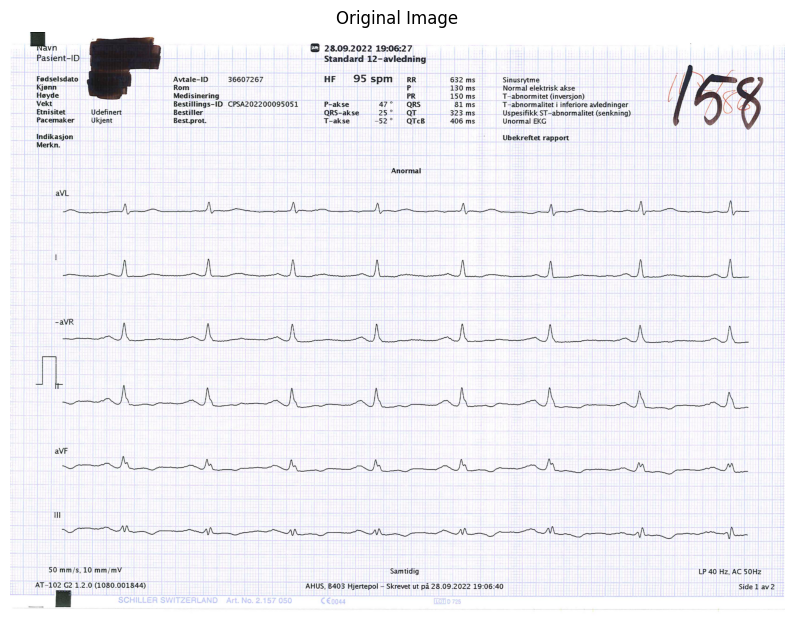

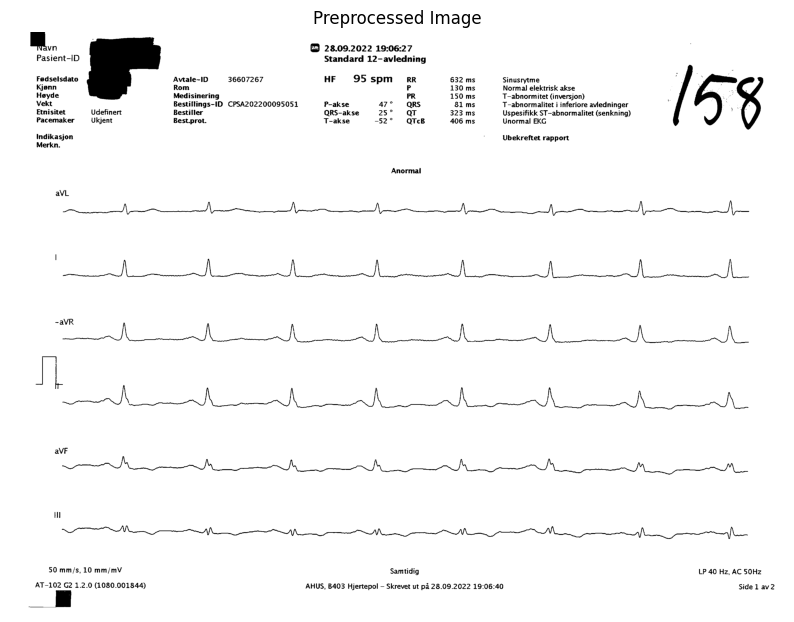

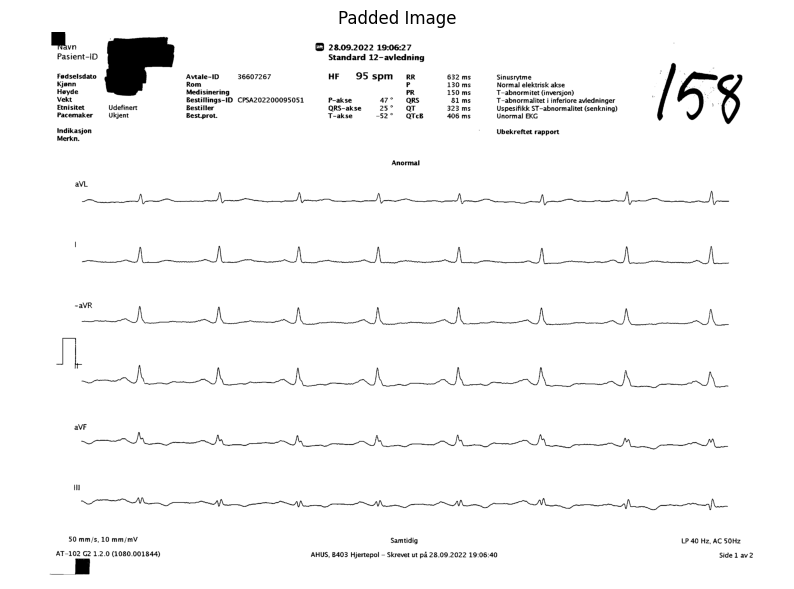

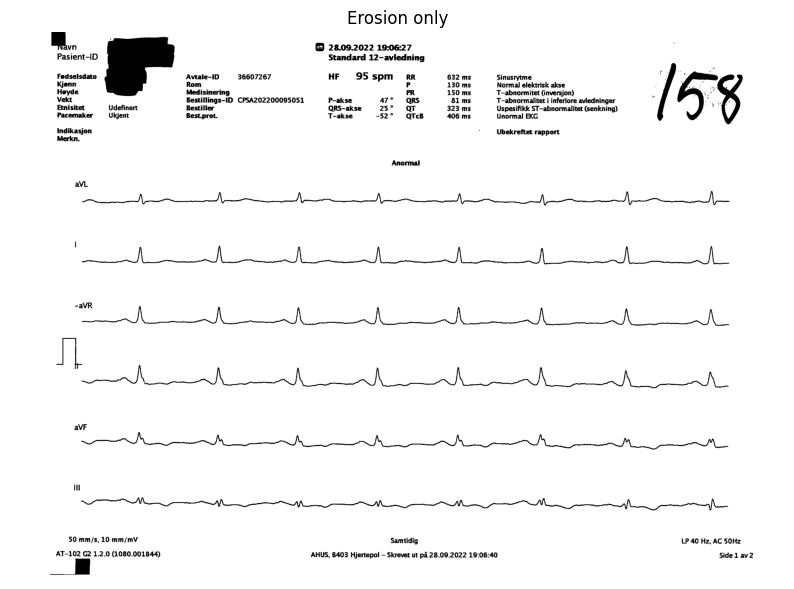

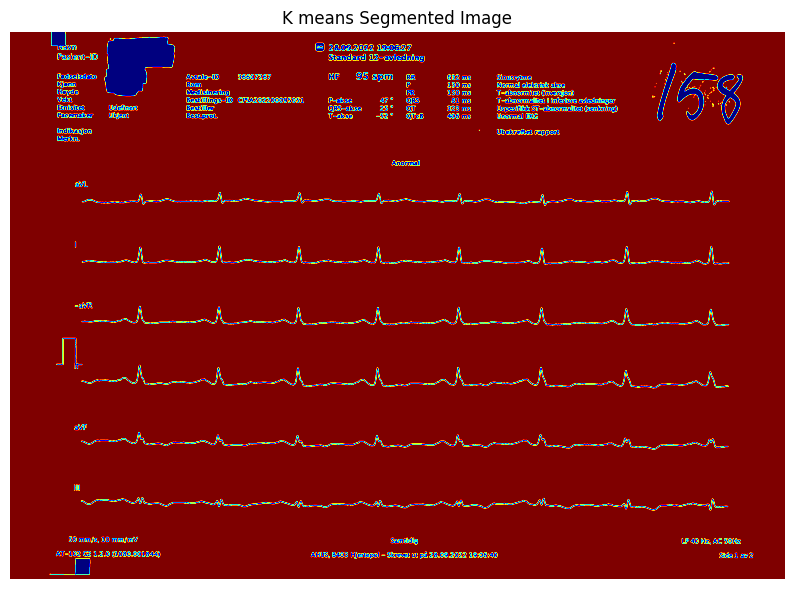

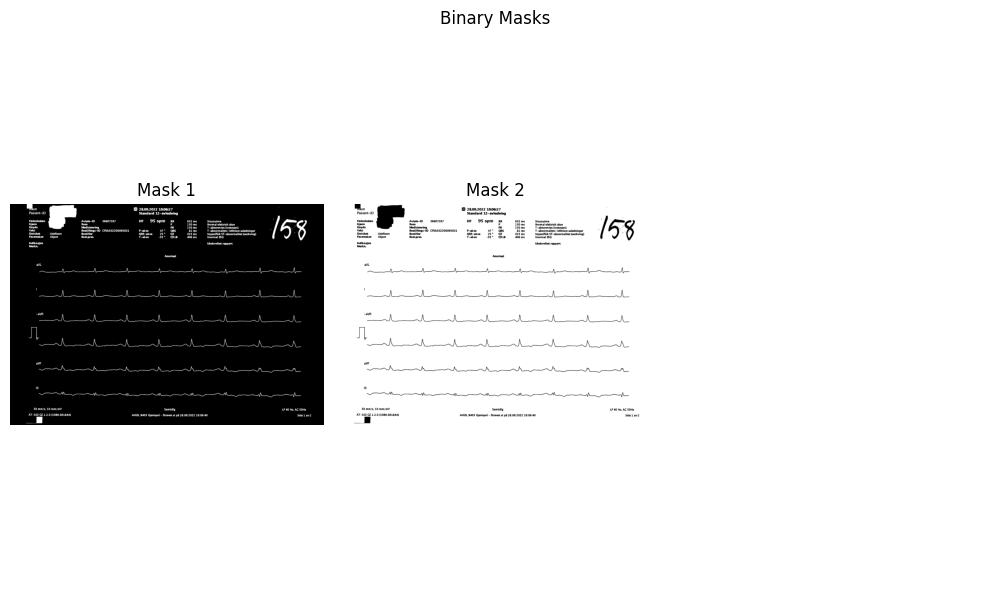

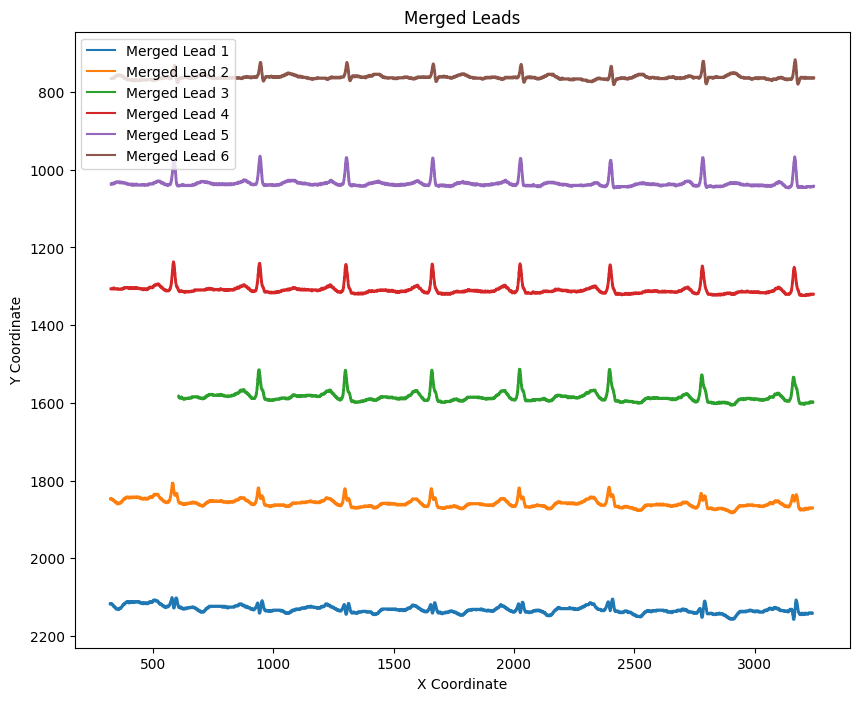

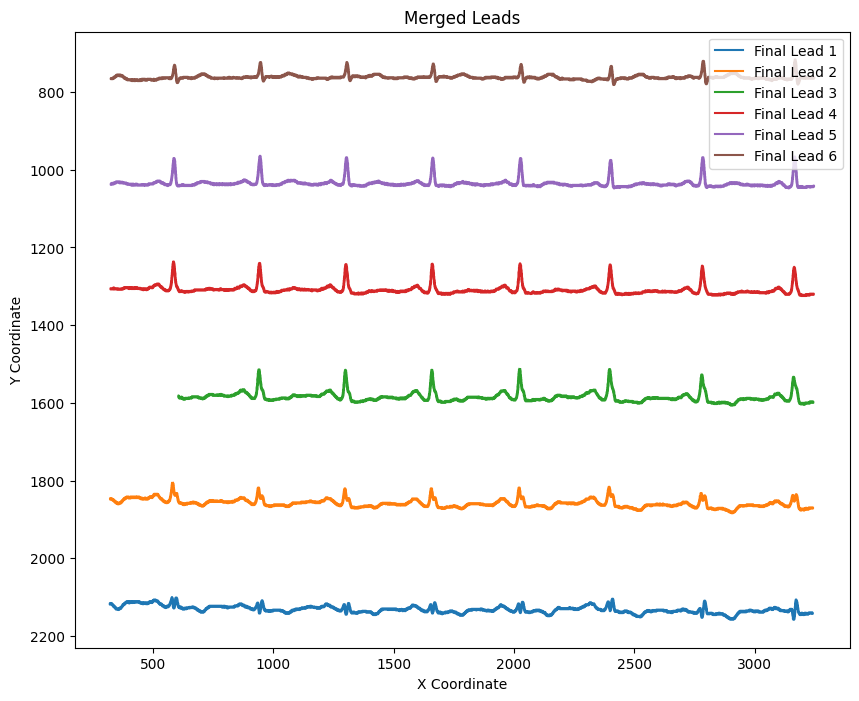

d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


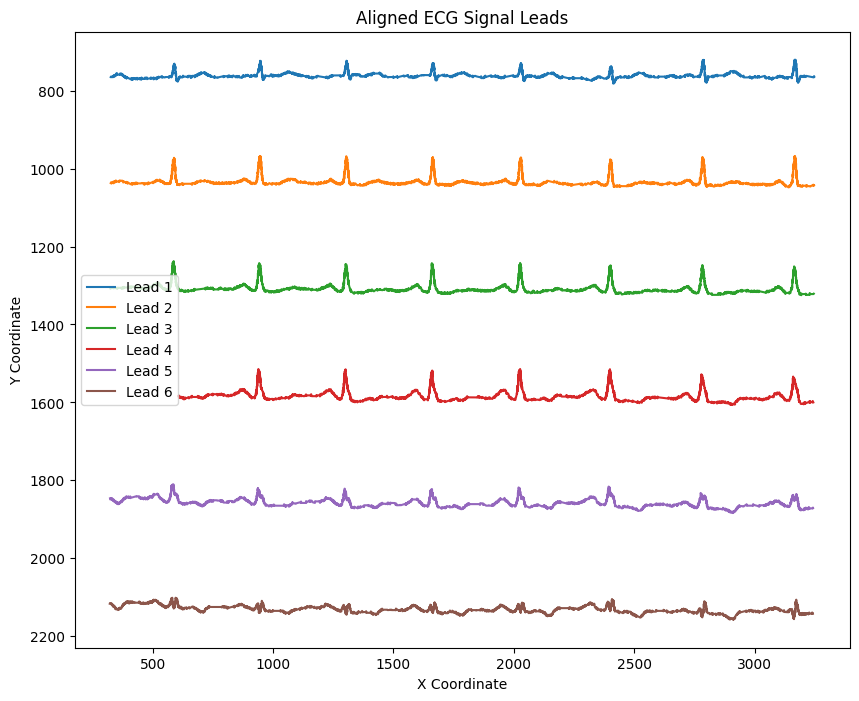

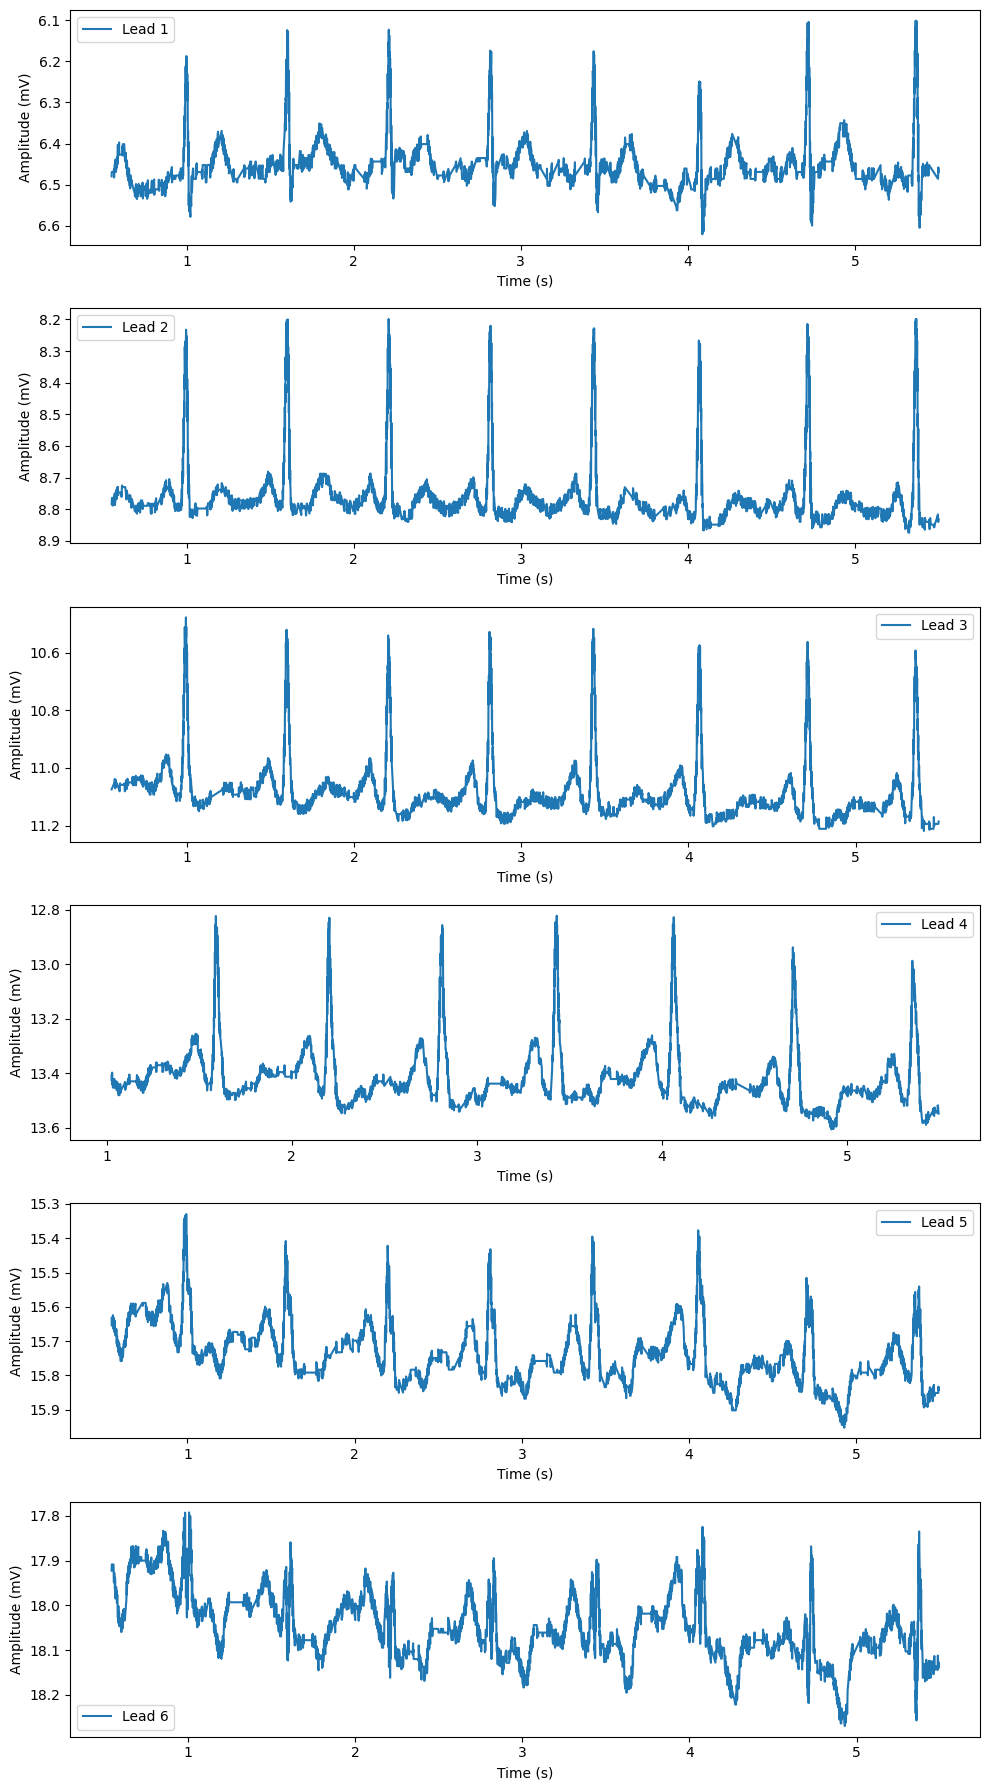

Time and amplitude values have been saved to ecg_time_amplitude.csv


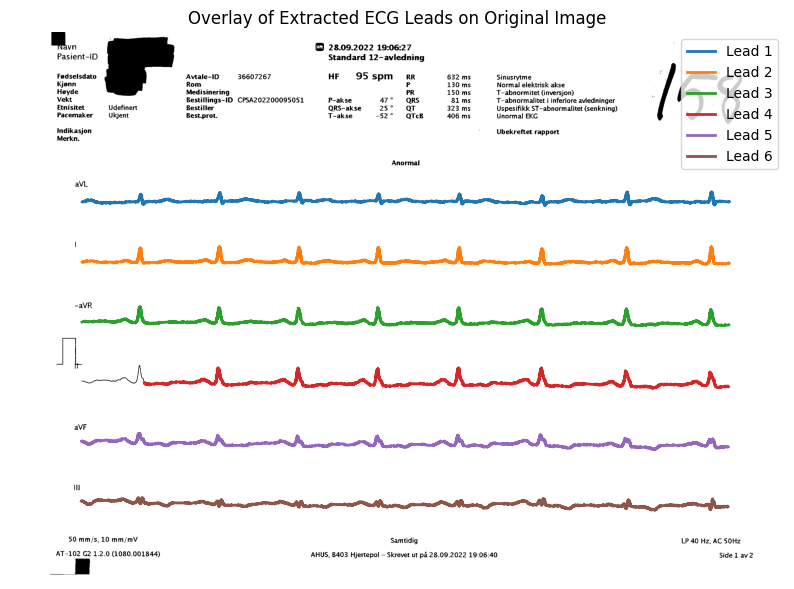

In [77]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd
import sys
from scipy import ndimage  # Make sure to import ndimage for `find_objects`
from sklearn.linear_model import LinearRegression

# Helper function to plot images
def plot_image(image, title, cmap='gray'):
    plt.figure(figsize=(10, 8))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

def plot_aligned_coordinates(aligned_coords):
    plt.figure(figsize=(10, 8))
    
    # Reverse the order of aligned leads to match top-to-bottom ordering
    for i, coords in enumerate(reversed(aligned_coords)):
        plt.plot(coords[:, 0], coords[:, 1], label=f'Lead {i+1}')
    
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.title('Aligned ECG Signal Leads')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()


def apply_kmeans(image, n_clusters=2):
    Z = image.reshape((-1, 1))  # Flatten the image
    Z = np.float32(Z)
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv.kmeans(Z, n_clusters, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
    segmented_image = labels.reshape((image.shape))
    return segmented_image, centers

from sklearn.mixture import GaussianMixture

def apply_gmm(image, n_components=2):
    Z = image.reshape((-1, 1))
    Z = np.float32(Z)

    gmm = GaussianMixture(n_components=n_components, covariance_type='tied')
    gmm.fit(Z)
    labels = gmm.predict(Z)
    
    segmented_image = labels.reshape(image.shape)
    return segmented_image, gmm.means_




def create_binary_masks(segmented_image, n_clusters):
    binary_masks = [(segmented_image == i).astype(np.uint8) * 255 for i in range(n_clusters)]
    return binary_masks

def extract_contour_coordinates(binary_masks):
    contour_coordinates = []
    for mask in binary_masks:
        contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            coords = contour[:, 0, :]  # Extract x and y coordinates
            contour_coordinates.append(coords)
    return contour_coordinates

def resample_contour(contour, num_points=100):
    x = contour[:, 0]
    y = contour[:, 1]
    f_interp = interp1d(np.arange(len(x)), x, kind='linear', fill_value="extrapolate")
    x_new = np.linspace(0, len(x) - 1, num_points)
    x_resampled = f_interp(x_new)
    f_interp = interp1d(np.arange(len(y)), y, kind='linear', fill_value="extrapolate")
    y_resampled = f_interp(x_new)
    return np.column_stack((x_resampled, y_resampled))

def calculate_gradient(coords):
    # Fit a linear regression to the x and y coordinates to find the slope (gradient)
    X = coords[:, 0].reshape(-1, 1)  # x-coordinates
    y = coords[:, 1]  # y-coordinates
    model = LinearRegression().fit(X, y)
    slope = model.coef_[0]  # The gradient of the line (dy/dx)
    return slope

def filter_and_merge_leads(contour_coords, min_size=1000, y_threshold=30, gradient_threshold=0.05):
    # Filter out small contours
    large_contours = [coords for coords in contour_coords if len(coords) > min_size]

    merged_leads = []
    current_lead = []
    
    for i, coords in enumerate(large_contours):
        if not current_lead:
            current_lead.append(coords)
            continue

        # Calculate the gradient for the current contour and the first contour in the current lead
        current_gradient = calculate_gradient(coords)
        lead_gradient = calculate_gradient(current_lead[0])

        # Check if the y-values are similar and gradients are similar enough to merge
        if (np.abs(coords[:, 1].mean() - current_lead[0][:, 1].mean()) < y_threshold and
            np.abs(current_gradient - lead_gradient) < gradient_threshold):
            current_lead.append(coords)
        else:
            # Merge the current lead
            merged_leads.append(np.vstack(current_lead))
            current_lead = [coords]

    # Add the last lead
    if current_lead:
        merged_leads.append(np.vstack(current_lead))

    return merged_leads


def enforce_only_leads(merged_coords, max_leads=6):
    """
    This function selects 6 leads that have consistent x ranges, ensuring that
    6 leads are always selected.
    
    Args:
    merged_coords: List of np.array coordinates of the leads.
    max_leads: The number of leads to select (default is 6).
    
    Returns:
    selected_coords: List of np.array coordinates of the selected leads.
    """
    
    # Calculate the x range for each lead
    lead_ranges = [
        (i, 
         coords[:, 0].max() - coords[:, 0].min()  # x range
        ) 
        for i, coords in enumerate(merged_coords)
    ]
    
    # Calculate the mean x range
    mean_x_range = np.mean([lead[1] for lead in lead_ranges])
    
    # Find the lead whose x range is closest to the mean x range
    initial_lead = min(lead_ranges, key=lambda x: abs(x[1] - mean_x_range))
    selected_leads = [initial_lead]  # Start with the lead closest to the mean
    
    # Sort the remaining leads by their proximity to the initial lead in x range
    remaining_leads = [
        lead for lead in lead_ranges if lead != initial_lead
    ]
    
    # Sort based on proximity in x range only
    remaining_leads.sort(
        key=lambda x: abs(x[1] - initial_lead[1])
    )
    
    # Select the top remaining leads based on x range proximity
    selected_leads += remaining_leads[:max_leads-1]  # Adding remaining leads to make 6 in total
    
    # Extract the indices of the selected leads
    selected_indices = [lead[0] for lead in selected_leads]
    
    # Return the selected leads while preserving the original order
    selected_coords = [merged_coords[i] for i in sorted(selected_indices)]
    
    return selected_coords
    
def plot_time_amplitude_single_column(time_amplitude_df):
    """
    Plots each lead's time-amplitude in a single column layout, with reversed plot order but consistent lead numbering.
    
    :param time_amplitude_df: DataFrame containing time and amplitude columns for the leads.
    """
    # Dynamically determine the number of leads from the DataFrame columns
    lead_columns = [col for col in time_amplitude_df.columns if '_time' in col]
    num_leads = len(lead_columns)

    plt.figure(figsize=(10, num_leads * 2))

    # Reverse the lead order but keep the numbering consistent
    for i, lead_num in enumerate(range(1, num_leads + 1)):
        # Reverse the plotting order, keeping numbering intact
        reversed_lead_num = num_leads - lead_num + 1
        time_col = f'Lead_{reversed_lead_num}_time'
        amp_col = f'Lead_{reversed_lead_num}_amplitude'

        # Only plot if both time and amplitude columns exist in the DataFrame
        if time_col in time_amplitude_df.columns and amp_col in time_amplitude_df.columns:
            plt.subplot(num_leads, 1, i + 1)
            plt.plot(time_amplitude_df[time_col], time_amplitude_df[amp_col])
            plt.title(f'Lead {lead_num}')  # Keep numbering consistent
            plt.xlabel('Time')
            plt.ylabel('Amplitude')
            plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
        else:
            print(f"Skipping Lead {reversed_lead_num} as it's missing in the DataFrame")

    plt.tight_layout()
    plt.show()




def plot_time_amplitude_overlay(image_path, time_amplitude_df, pixels_per_mm_x, pixels_per_mm_y):
    """
    Plots the ECG leads overlaying on the original ECG image.

    :param image_path: The path to the original ECG image or the image matrix.
    :param time_amplitude_df: DataFrame containing the time and amplitude for each lead.
    :param pixels_per_mm_x: The pixel-to-mm conversion factor for the x-axis (time).
    :param pixels_per_mm_y: The pixel-to-mm conversion factor for the y-axis (amplitude).
    """

    plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

    # Plot the original ECG image
    plt.imshow(image_path, cmap='gray')

    # Conversion factors (inverse of what was used to convert from pixels to time/amplitude)
    pixel_per_time = pixels_per_mm_x * 50  # 50 mm = 1 second
    pixel_per_amplitude = pixels_per_mm_y * 10  # 10 mm = 1 mV

    # Dynamically determine the number of leads from the DataFrame columns
    lead_columns = [col for col in time_amplitude_df.columns if '_time' in col]
    num_leads = len(lead_columns)

    # Overlay each lead present in time_amplitude_df
    for i in range(1, num_leads + 1):
        time_col = f'Lead_{i}_time'
        amp_col = f'Lead_{i}_amplitude'
        
        if time_col in time_amplitude_df.columns and amp_col in time_amplitude_df.columns:
            # Convert time and amplitude back to pixel coordinates
            x_pixels = time_amplitude_df[time_col] * pixel_per_time
            y_pixels = time_amplitude_df[amp_col] * pixel_per_amplitude

            plt.plot(x_pixels, y_pixels, label=f'Lead {i}', linewidth=2)  # Plot each lead
        else:
            print(f"Skipping Lead {i} as it's missing in the DataFrame")

    plt.title('Overlay of Extracted ECG Leads on Original Image')
    plt.xlabel('Time (pixels)')
    plt.ylabel('Amplitude (pixels)')
    
    plt.legend()
    plt.axis('off')  # Hide axis since we're overlaying on an image
    plt.show()

# Function to extract time and amplitude from aligned leads
def extract_time_amplitude(aligned_leads, pixels_per_mm_x, pixels_per_mm_y):
    lead_data = {}

    # Conversion factors
    time_per_pixel = 1 / (pixels_per_mm_x * 50)  # 50 mm = 1 second
    amplitude_per_pixel = 1 / (pixels_per_mm_y * 10)  # 10 mm = 1 mV

    # Reverse the order of aligned leads to match top-to-bottom ordering
    aligned_leads = list(reversed(aligned_leads))

    for i, lead in enumerate(aligned_leads):
        time_values = lead[:, 0] * time_per_pixel  # Convert x-coordinates to time
        amplitude_values = lead[:, 1] * amplitude_per_pixel  # Convert y-coordinates to amplitude
        lead_data[f'Lead_{i+1}_time'] = time_values
        lead_data[f'Lead_{i+1}_amplitude'] = amplitude_values
    
    return pd.DataFrame(lead_data)



def plot_binary_masks(binary_masks):
    num_masks = len(binary_masks)
    cols = 3
    rows = (num_masks + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(10, 6))
    axes = axes.flatten()

    plt.suptitle('Binary Masks')
    
    for i, mask in enumerate(binary_masks):
        axes[i].imshow(mask, cmap='gray')
        axes[i].set_title(f'Mask {i+1}')
        axes[i].axis('off')

    for j in range(num_masks, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

def plot_merged_leads(merged_leads):
    plt.figure(figsize=(10, 8))
    plt.title('Merged Leads')

    for i, coords in enumerate(merged_leads):
        plt.plot(coords[:, 0], coords[:, 1], label=f'Merged Lead {i+1}')
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()

    
def plot_final_leads(merged_leads):
    plt.figure(figsize=(10, 8))
    plt.title('Merged Leads')

    for i, coords in enumerate(merged_leads):
        plt.plot(coords[:, 0], coords[:, 1], label=f'Final Lead {i+1}')
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()

def plot_lead_time_amplitude(time_amplitude_df):
    """
    Plots time vs amplitude for each lead in the time_amplitude_df DataFrame.
    
    :param time_amplitude_df: DataFrame containing time and amplitude columns for each lead.
    """
    num_leads = len([col for col in time_amplitude_df.columns if '_time' in col])
    
    plt.figure(figsize=(10, num_leads * 3))
    
    for i in range(1, num_leads + 1):
        time_col = f'Lead_{i}_time'
        amplitude_col = f'Lead_{i}_amplitude'
        
        plt.subplot(num_leads, 1, i)  # Creates a subplot for each lead
        plt.plot(time_amplitude_df[time_col], time_amplitude_df[amplitude_col], label=f'Lead {i}')
        plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude (mV)')
        plt.legend()
    
    plt.tight_layout()
    plt.show()



def align_leads(contour_coords, num_points=5000):
    aligned_coords = []
    for coords in contour_coords:
        x = coords[:, 0]
        y = coords[:, 1]
        f_interp = interp1d(x, y, kind='linear', fill_value="extrapolate")
        x_new = np.linspace(x.min(), x.max(), num_points)
        y_new = f_interp(x_new)
        aligned_coords.append(np.column_stack((x_new, y_new)))
    return aligned_coords

def image_to_sequence(contour_coords, pixels_per_mm_x, pixels_per_mm_y):
    """
    Converts the contour coordinates into time-amplitude sequences using pixel-to-time and pixel-to-amplitude conversions.
    Reverses the lead numbering.
    
    :param contour_coords: A list of contour coordinates (x, y).
    :param pixels_per_mm_x: The conversion factor from pixels to mm for the x-axis (time).
    :param pixels_per_mm_y: The conversion factor from pixels to mm for the y-axis (amplitude).
    :return: DataFrame containing time and amplitude for each lead.
    """
    lead_data = {}

    # Conversion factors
    time_per_pixel = 1 / (pixels_per_mm_x * 50)  # 50 mm = 1 second
    amplitude_per_pixel = 1 / (pixels_per_mm_y * 10)  # 10 mm = 1 mV

    num_leads = len(contour_coords)

    for i, coords in enumerate(contour_coords):
        # Reverse the lead numbering
        lead_number = num_leads - i
        
        time_values = coords[:, 0] * time_per_pixel  # Convert x-coordinates to time
        amplitude_values = coords[:, 1] * amplitude_per_pixel  # Convert y-coordinates to amplitude
        
        lead_data[f'Lead_{lead_number}_time'] = time_values
        lead_data[f'Lead_{lead_number}_amplitude'] = amplitude_values

    return pd.DataFrame(lead_data)

# Main processing function
def process_ecg_image(image_path, padding_size=100):
    # Step 1: Load the image
    image = cv.imread(image_path)
    if image is None:
        print('Cannot open image: ' + image_path)
        sys.exit(0)

    plot_image(image, 'Original Image')

    # Convert the image to a custom Image class
    img_obj = CustomImage(image)

    # Initialize Preprocessor
    preprocessor = Preprocessor()

    # Apply preprocessing
    preprocessed_img_obj, rect = preprocessor.preprocess(img_obj)
    
    # Convert the preprocessed image back to numpy array
    preprocessed_image = preprocessed_img_obj.array

    # Plot the preprocessed image
    plot_image(preprocessed_image, 'Preprocessed Image')

    # Add padding to the left and right of the preprocessed image
    padded_image = cv.copyMakeBorder(
        preprocessed_image, 
        top=0, bottom=0, left=padding_size, right=padding_size, 
        borderType=cv.BORDER_CONSTANT, value=255  # Assuming the background is white (255)
    )
    
    # Plot the padded image
    plot_image(padded_image, 'Padded Image')
    
    # ############################################
    # Define kernel
    kernel = np.ones((2, 2), np.uint8)

    # Erosion and Dilation
    img_erosion = cv.erode(padded_image, kernel, iterations=1)    
    plot_image(img_erosion, 'Erosion only')

    # Apply GMM segmentation on the padded image
    # segmented_image, centers = apply_gmm(padded_image, n_components=2)
    segmented_image, centers = apply_kmeans(img_erosion, n_clusters=2)
    # plot_image(segmented_image, "Segmented Image (GMM)", cmap='jet')
    plot_image(segmented_image, "K means Segmented Image", cmap='jet')

    # Create binary masks and extract contours
    binary_masks = create_binary_masks(segmented_image, n_clusters=2)
    plot_binary_masks(binary_masks)  # Plot binary masks
    
    contour_coords = extract_contour_coordinates(binary_masks)
    
    # Filter, merge, and align leads
    merged_leads = filter_and_merge_leads(contour_coords)
    plot_merged_leads(merged_leads)  # Plot merged leads

    # Only pull leads
    final_leads = enforce_only_leads(merged_leads)
    plot_final_leads(final_leads)  # Plot merged leads

    # Align leads and sort them from top to bottom
    aligned_leads = align_leads(final_leads, num_points=5000)
    # print(aligned_leads)
    # Plot the aligned ECG leads
    plot_aligned_coordinates(aligned_leads)

    # Example usage with calculated pixel scaling factors
    pixels_per_mm_x = 11.81
    pixels_per_mm_y = 11.81

    # Extract time and amplitude values for each lead (sequence extraction)
    time_amplitude_df = image_to_sequence(aligned_leads, pixels_per_mm_x, pixels_per_mm_y)
    # Assuming time_amplitude_df is already created from image_to_sequence function
    plot_lead_time_amplitude(time_amplitude_df)


    output_csv_path = 'ecg_time_amplitude.csv'
    time_amplitude_df.to_csv(output_csv_path, index=False)
    print(f"Time and amplitude values have been saved to {output_csv_path}")
    # # Plot each lead's time vs. amplitude with 6 rows and 1 column
    # plot_time_amplitude_single_column(time_amplitude_df)
    plot_time_amplitude_overlay(padded_image, time_amplitude_df, pixels_per_mm_x, pixels_per_mm_y)

    return aligned_leads, time_amplitude_df

# Example usage
image_path = r'../rotated_data_png/158_F_page_1.png'
aligned_leads, time_amplitude_df = process_ecg_image(image_path)




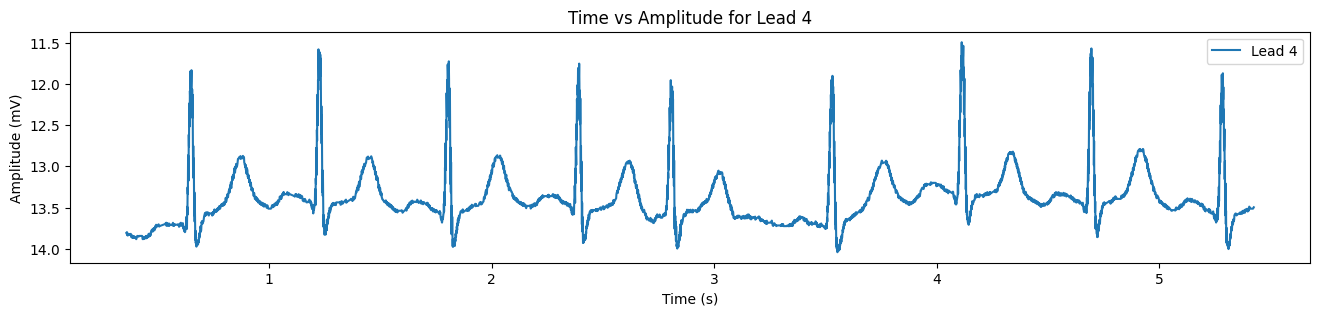

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
time_amplitude_df = pd.read_csv('ecg_time_amplitude.csv')

# Function to plot a specific lead
def plot_single_lead(time_amplitude_df, lead_number):
    """
    Plots time vs amplitude for a specific lead in the DataFrame.
    
    :param time_amplitude_df: DataFrame containing time and amplitude data.
    :param lead_number: The lead number to plot (e.g., 1 for Lead 1).
    """
    # Construct column names for the specific lead
    time_col = f'Lead_{lead_number}_time'
    amplitude_col = f'Lead_{lead_number}_amplitude'
    
    # Check if the columns exist in the DataFrame
    if time_col in time_amplitude_df.columns and amplitude_col in time_amplitude_df.columns:
        # Plot the lead's time vs amplitude
        plt.figure(figsize=(16, 3))
        plt.plot(time_amplitude_df[time_col], time_amplitude_df[amplitude_col], label=f'Lead {lead_number}')
        plt.gca().invert_yaxis()  # Invert y-axis to match typical ECG display
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude (mV)')
        plt.title(f'Time vs Amplitude for Lead {lead_number}')
        plt.legend()
        plt.show()
    else:
        print(f"Lead {lead_number} not found in the DataFrame.")

# Example: Plot Lead 1
plot_single_lead(time_amplitude_df, lead_number=4)


## Validation with max-min Leads 1-6

PCC Results:
                Lead       PCC
0  Lead_1_amplitude -0.788268
1  Lead_2_amplitude -0.813067
2  Lead_3_amplitude -0.372481
3  Lead_4_amplitude -0.061494
4  Lead_5_amplitude  0.071989
5  Lead_6_amplitude -0.774497
RMSE Results:
                Lead        RMSE
0  Lead_1_amplitude  431.983012
1  Lead_2_amplitude  560.858727
2  Lead_3_amplitude  237.248881
3  Lead_4_amplitude  151.946318
4  Lead_5_amplitude  250.006074
5  Lead_6_amplitude  216.063851


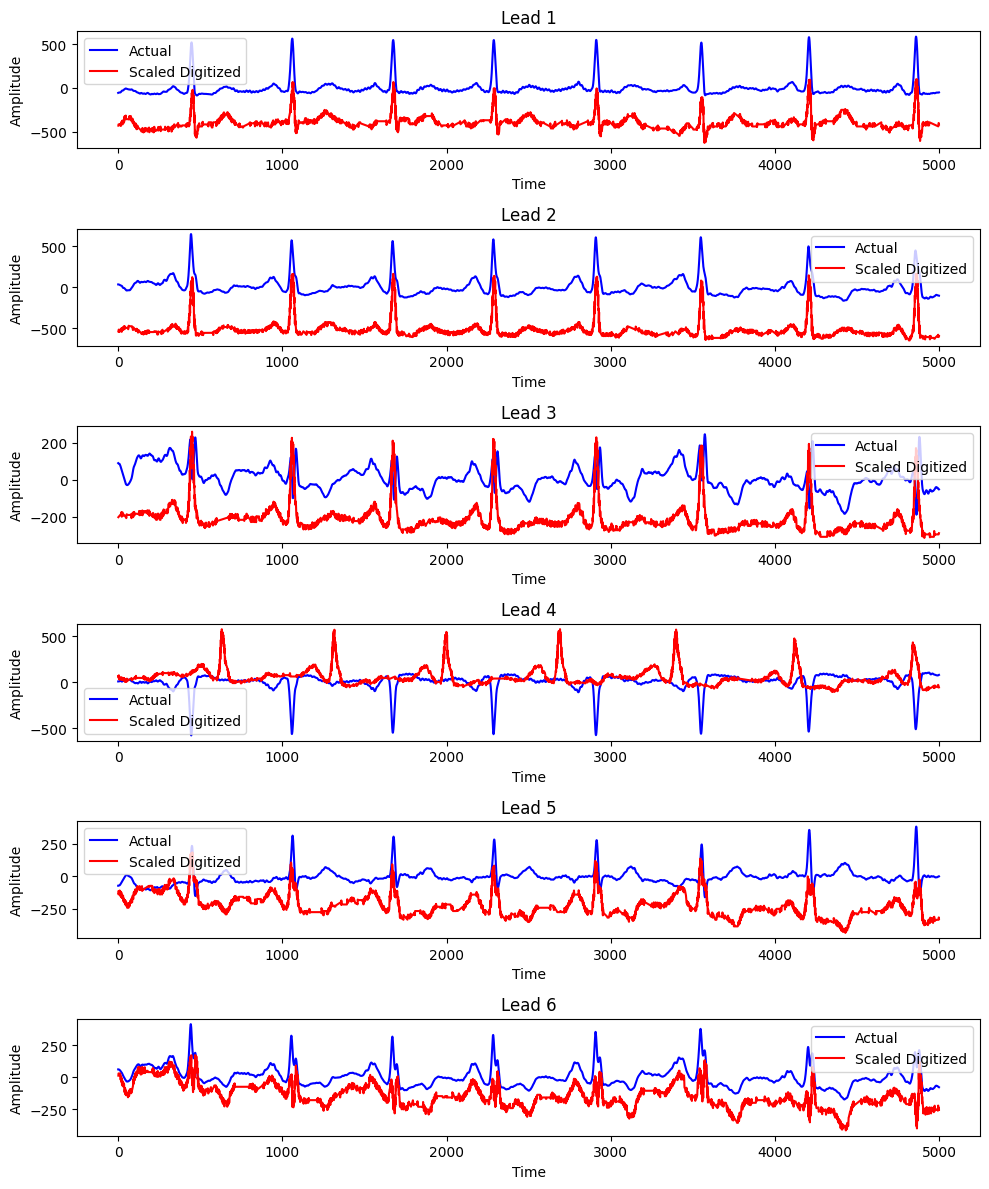

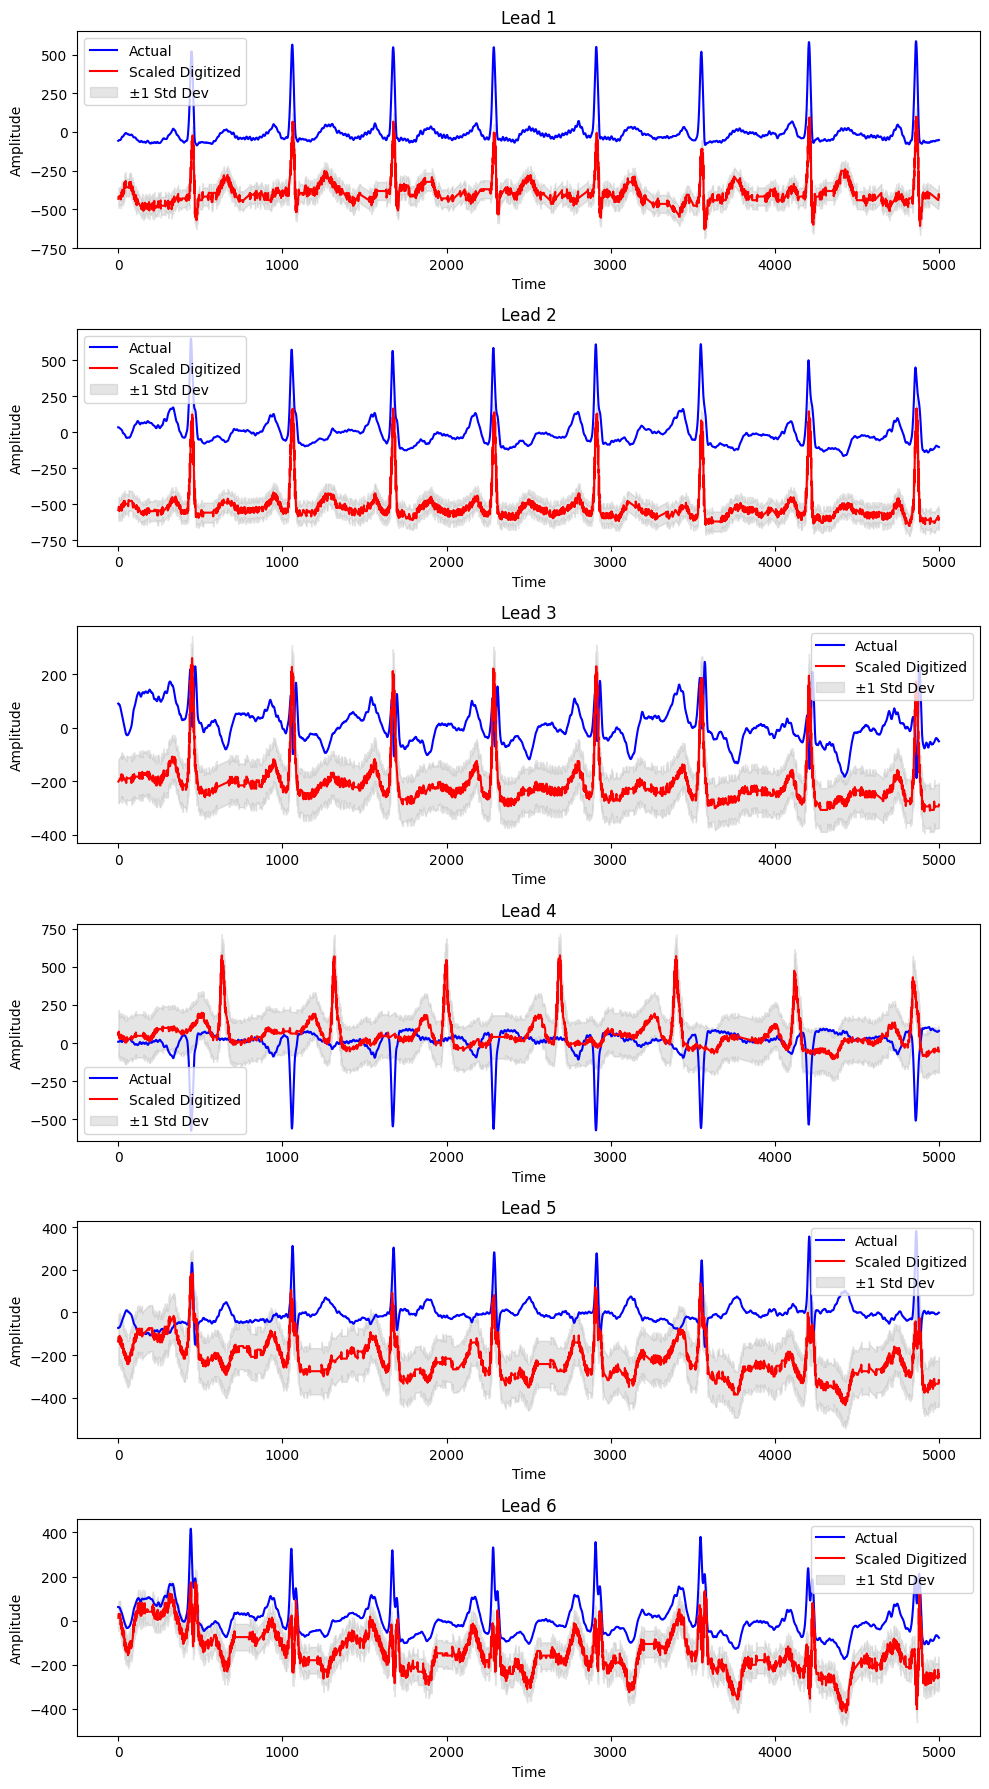

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# Define the necessary functions
def pcc(y_true, y_pred):
    """Calculate Pearson Correlation Coefficient."""
    return y_true.corr(y_pred)

def rmse(y_true, y_pred):
    """Calculate Root Mean Squared Error."""
    return sqrt(np.mean((y_true - y_pred) ** 2))

# File paths
digitized_file_path = r"ecg_time_amplitude.csv"  # Path to your digitized data file
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet\20230427-120205.926316_new.csv"  # Path to your actual data file for 86
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet\20230427-120219.848511_new.csv"  # Path to your actual data file for 105
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet\20230427-120222.630823_new.csv"  # Path to your actual data file For 108 page 1
actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet\20230427-120306.333710_new.csv"  # Path to your actual data file For 158 page 1


# Load the data
digitized_df = pd.read_csv(digitized_file_path)
actual_df = pd.read_csv(actual_file_path)

# Leads to validate
leads_to_validate = [f'Lead_{i}_amplitude' for i in range(1, 7)]  # Lead_1 to Lead_6

# Initialize lists for storing results
pcc_results = []
rmse_results = []

# Determine the min and max values for scaling
min_max_values = {}
for lead in leads_to_validate:
    if lead not in actual_df.columns or lead not in digitized_df.columns:
        print(f"Warning: Lead '{lead}' is missing in one of the files.")
        continue

    actual_min = actual_df[lead].min()  # Minimum value in the actual data
    actual_max = actual_df[lead].max()  # Maximum value in the actual data
    digitized_min = digitized_df[lead].min()  # Minimum value in the digitized data
    digitized_max = digitized_df[lead].max()  # Maximum value in the digitized data

    min_max_values[lead] = {
        'actual_min': actual_min,
        'actual_max': actual_max,
        'digitized_min': digitized_min,
        'digitized_max': digitized_max
    }

# Apply min-max scaling to digitized data
digitized_df_scaled = digitized_df.copy()
for lead, values in min_max_values.items():
    actual_min = values['actual_min']
    actual_max = values['actual_max']
    digitized_min = values['digitized_min']
    digitized_max = values['digitized_max']

    # Min-Max Scaling formula: (x - min) / (max - min) * (new_max - new_min) + new_min
    digitized_df_scaled[lead] = (digitized_df[lead] - digitized_min) / (digitized_max - digitized_min) * (actual_max - actual_min) + actual_min

# Calculate PCC and RMSE for each lead
for lead in leads_to_validate:
    if lead not in actual_df.columns or lead not in digitized_df_scaled.columns:
        continue

    y_true = actual_df[lead]
    y_pred = digitized_df_scaled[lead]

    # Align lengths by truncating
    min_length = min(len(y_true), len(y_pred))
    y_true = y_true.iloc[:min_length]
    y_pred = y_pred.iloc[:min_length]

    # Check for inversion issue
    if y_pred.mean() < y_true.mean():
        y_pred = -y_pred  # Invert y_pred if needed

    # Calculate metrics
    pcc_value = pcc(y_true, y_pred)
    rmse_value = rmse(y_true, y_pred)

    # Append results to lists
    pcc_results.append({'Lead': lead, 'PCC': pcc_value})
    rmse_results.append({'Lead': lead, 'RMSE': rmse_value})

# Convert lists to DataFrames
pcc_df = pd.DataFrame(pcc_results)
rmse_df = pd.DataFrame(rmse_results)

# Print the results
print("PCC Results:\n", pcc_df)
print("RMSE Results:\n", rmse_df)

def plot_scaled_digitized_single_column(digitized_df_scaled, actual_df):
    """
    Plots each lead's time-amplitude for scaled digitized data in a single column layout, 
    with digitized data values inverted but without any axis inversion.
    
    :param digitized_df_scaled: DataFrame containing scaled digitized data.
    :param actual_df: DataFrame containing actual data for reference.
    """
    # Dynamically determine the number of leads from the DataFrame columns
    lead_columns = [col for col in digitized_df_scaled.columns if '_amplitude' in col]
    num_leads = len(lead_columns)

    plt.figure(figsize=(10, num_leads * 2))

    # Plot each lead
    for i, lead_num in enumerate(range(1, num_leads + 1)):
        amp_col_digitized = f'Lead_{lead_num}_amplitude'
        amp_col_actual = f'Lead_{lead_num}_amplitude'

        if amp_col_digitized not in digitized_df_scaled.columns:
            print(f"Skipping Lead {lead_num} (digitized) as it's missing in the DataFrame")
            continue

        if amp_col_actual not in actual_df.columns:
            print(f"Skipping Lead {lead_num} (actual) as it's missing in the DataFrame")
            continue

        # Align lengths by truncating
        length = min(len(actual_df[amp_col_actual]), len(digitized_df_scaled[amp_col_digitized]))
        y_actual = actual_df[amp_col_actual].iloc[:length]
        y_digitized = digitized_df_scaled[amp_col_digitized].iloc[:length]

        # Invert the digitized values
        y_digitized = -y_digitized

        # Plotting
        plt.subplot(num_leads, 1, i + 1)
        plt.plot(y_actual, label='Actual', color='blue')
        plt.plot(y_digitized, label='Scaled Digitized', color='red')
        plt.title(f'Lead {lead_num}')  # Keep numbering consistent
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function with your data
plot_scaled_digitized_single_column(digitized_df_scaled, actual_df)

def plot_scaled_digitized_single_column_with_error(digitized_df_scaled, actual_df):
    """
    Plots each lead's time-amplitude for scaled digitized data in a single column layout, 
    with digitized data values inverted but without any axis inversion.
    Also, plots standard deviation error as a shaded region.
    
    :param digitized_df_scaled: DataFrame containing scaled digitized data.
    :param actual_df: DataFrame containing actual data for reference.
    """
    # Dynamically determine the number of leads from the DataFrame columns
    lead_columns = [col for col in digitized_df_scaled.columns if '_amplitude' in col]
    num_leads = len(lead_columns)

    plt.figure(figsize=(10, num_leads * 3))

    # Plot each lead
    for i, lead_num in enumerate(range(1, num_leads + 1)):
        amp_col_digitized = f'Lead_{lead_num}_amplitude'
        amp_col_actual = f'Lead_{lead_num}_amplitude'

        if amp_col_digitized not in digitized_df_scaled.columns:
            print(f"Skipping Lead {lead_num} (digitized) as it's missing in the DataFrame")
            continue

        if amp_col_actual not in actual_df.columns:
            print(f"Skipping Lead {lead_num} (actual) as it's missing in the DataFrame")
            continue

        # Align lengths by truncating
        length = min(len(actual_df[amp_col_actual]), len(digitized_df_scaled[amp_col_digitized]))
        y_actual = actual_df[amp_col_actual].iloc[:length]
        y_digitized = digitized_df_scaled[amp_col_digitized].iloc[:length]

        # Invert the digitized values
        y_digitized = -y_digitized

        # Calculate standard deviation of the error
        error = y_actual - y_digitized
        std_error = np.std(error)

        # Plotting
        plt.subplot(num_leads, 1, i + 1)
        plt.plot(y_actual, label='Actual', color='blue')
        plt.plot(y_digitized, label='Scaled Digitized', color='red')
        
        # Plot the standard deviation error as a shaded region
        plt.fill_between(
            range(len(y_digitized)),
            y_digitized - std_error,  # Lower bound
            y_digitized + std_error,  # Upper bound
            color='gray', alpha=0.2, label='±1 Std Dev'
        )
        
        plt.title(f'Lead {lead_num}')  # Keep numbering consistent
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function with your data
plot_scaled_digitized_single_column_with_error(digitized_df_scaled, actual_df)


## Validation with max-min Leads 7-12

PCC Results:
                 Lead       PCC
0   Lead_7_amplitude -0.381691
1   Lead_8_amplitude -0.003736
2   Lead_9_amplitude  0.005504
3  Lead_10_amplitude -0.938722
4  Lead_11_amplitude -0.827964
5  Lead_12_amplitude -0.359373
RMSE Results:
                 Lead        RMSE
0   Lead_7_amplitude  217.397448
1   Lead_8_amplitude  477.908581
2   Lead_9_amplitude  539.322106
3  Lead_10_amplitude  505.328461
4  Lead_11_amplitude  321.234197
5  Lead_12_amplitude  210.433587


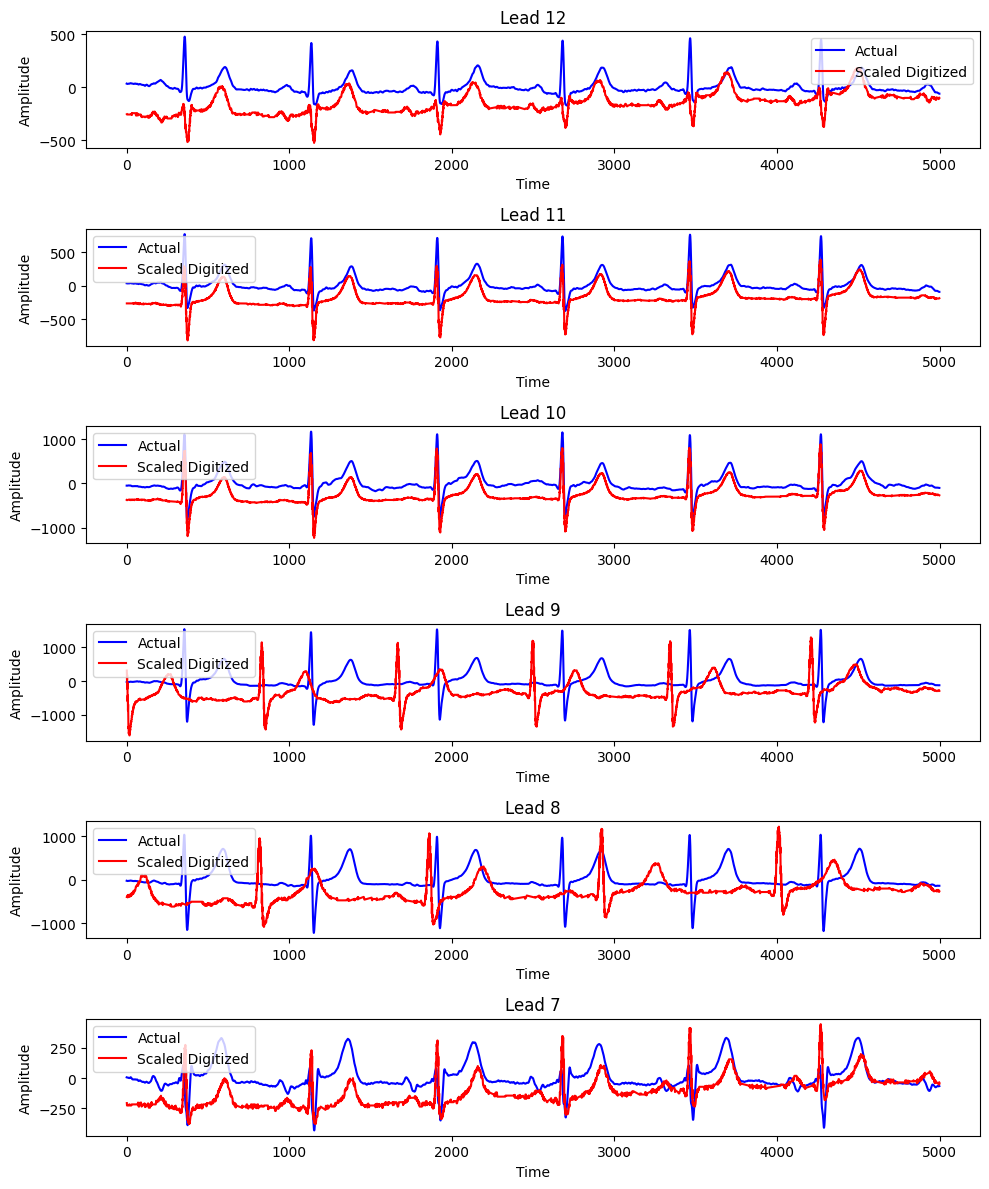

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# Define the necessary functions
def pcc(y_true, y_pred):
    """Calculate Pearson Correlation Coefficient."""
    return y_true.corr(y_pred)

def rmse(y_true, y_pred):
    """Calculate Root Mean Squared Error."""
    return sqrt(np.mean((y_true - y_pred) ** 2))

# File paths
digitized_file_path = r"ecg_leads.csv"  # Path to your digitized data file
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet\20230427-120222.630823_new.csv"  # Path to your actual data file For 108 page 1
actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet\20230427-120205.926316_new.csv"  # Path to your actual data file For 86 page 1

# Load the data
digitized_df = pd.read_csv(digitized_file_path)
actual_df = pd.read_csv(actual_file_path)

# Leads to validate
leads_to_validate = [f'Lead_{i}_amplitude' for i in range(7, 13)]  # Lead_7 to Lead_12

# Initialize lists for storing results
pcc_results = []
rmse_results = []

# Determine the min and max values for scaling
min_max_values = {}
for lead in leads_to_validate:
    if lead not in actual_df.columns or lead not in digitized_df.columns:
        print(f"Warning: Lead '{lead}' is missing in one of the files.")
        continue

    actual_min = actual_df[lead].min()  # Minimum value in the actual data
    actual_max = actual_df[lead].max()  # Maximum value in the actual data
    digitized_min = digitized_df[lead].min()  # Minimum value in the digitized data
    digitized_max = digitized_df[lead].max()  # Maximum value in the digitized data

    min_max_values[lead] = {
        'actual_min': actual_min,
        'actual_max': actual_max,
        'digitized_min': digitized_min,
        'digitized_max': digitized_max
    }

# Apply min-max scaling to digitized data
digitized_df_scaled = digitized_df.copy()
for lead, values in min_max_values.items():
    actual_min = values['actual_min']
    actual_max = values['actual_max']
    digitized_min = values['digitized_min']
    digitized_max = values['digitized_max']

    # Min-Max Scaling formula: (x - min) / (max - min) * (new_max - new_min) + new_min
    digitized_df_scaled[lead] = (digitized_df[lead] - digitized_min) / (digitized_max - digitized_min) * (actual_max - actual_min) + actual_min

# Calculate PCC and RMSE for each lead
for lead in leads_to_validate:
    if lead not in actual_df.columns or lead not in digitized_df_scaled.columns:
        continue

    y_true = actual_df[lead]
    y_pred = digitized_df_scaled[lead]

    # Align lengths by truncating
    min_length = min(len(y_true), len(y_pred))
    y_true = y_true.iloc[:min_length]
    y_pred = y_pred.iloc[:min_length]

    # Check for inversion issue
    if y_pred.mean() < y_true.mean():
        y_pred = -y_pred  # Invert y_pred if needed

    # Calculate metrics
    pcc_value = pcc(y_true, y_pred)
    rmse_value = rmse(y_true, y_pred)

    # Append results to lists
    pcc_results.append({'Lead': lead, 'PCC': pcc_value})
    rmse_results.append({'Lead': lead, 'RMSE': rmse_value})

# Convert lists to DataFrames
pcc_df = pd.DataFrame(pcc_results)
rmse_df = pd.DataFrame(rmse_results)

# Print the results
print("PCC Results:\n", pcc_df)
print("RMSE Results:\n", rmse_df)

def plot_scaled_digitized_single_column(digitized_df_scaled, actual_df):
    """
    Plots each lead's time-amplitude for scaled digitized data in a single column layout,
    with digitized data values inverted but without inverting the y-axis.

    :param digitized_df_scaled: DataFrame containing scaled digitized data.
    :param actual_df: DataFrame containing actual data for reference.
    """
    # Define the lead range you want to plot
    lead_range = range(12, 6, -1)  # This creates a range from 12 to 7 (inclusive)
    num_leads = len(lead_range)

    plt.figure(figsize=(10, num_leads * 2))

    # Plot each lead in the specified range
    for i, lead_num in enumerate(lead_range):
        amp_col = f'Lead_{lead_num}_amplitude'

        if amp_col not in digitized_df_scaled.columns:
            print(f"Skipping Lead {lead_num} as it's missing in the DataFrame")
            continue

        # Align lengths by truncating
        length = min(len(actual_df[amp_col]), len(digitized_df_scaled[amp_col]))
        y_actual = actual_df[amp_col].iloc[:length]
        y_digitized = digitized_df_scaled[amp_col].iloc[:length]

        # Invert the digitized values
        y_digitized = -y_digitized

        # Plotting
        plt.subplot(num_leads, 1, i + 1)
        plt.plot(y_actual, label='Actual', color='blue')
        plt.plot(y_digitized, label='Scaled Digitized', color='red')
        plt.title(f'Lead {lead_num}')  # Keep numbering consistent
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function with your data
plot_scaled_digitized_single_column(digitized_df_scaled, actual_df)




PCC Results:
                 Lead       PCC
0   Lead_7_amplitude -0.798157
1   Lead_8_amplitude -0.947093
2   Lead_9_amplitude -0.943685
3  Lead_10_amplitude -0.009091
4  Lead_11_amplitude -0.840051
5  Lead_12_amplitude -0.691862
RMSE Results:
                 Lead        RMSE
0   Lead_7_amplitude  109.811928
1   Lead_8_amplitude  273.874226
2   Lead_9_amplitude  298.493231
3  Lead_10_amplitude  219.425407
4  Lead_11_amplitude  133.439425
5  Lead_12_amplitude   79.632058


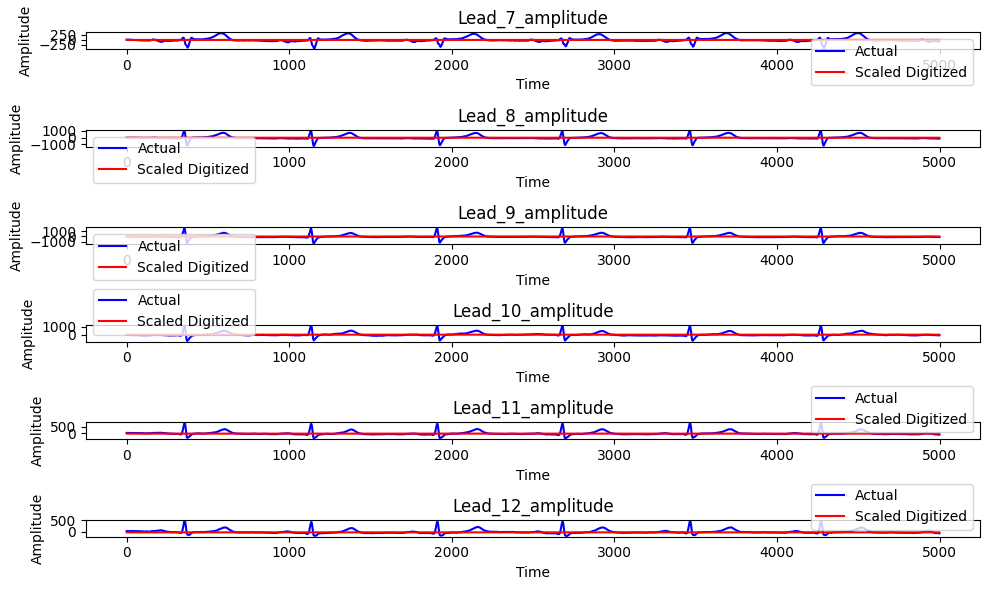

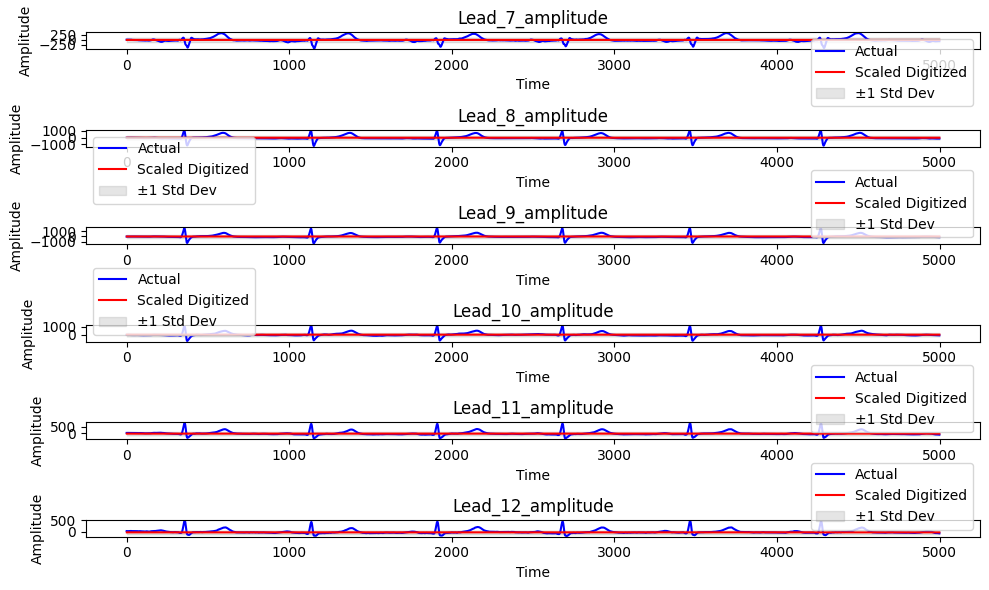

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# Define the necessary functions
def pcc(y_true, y_pred):
    """Calculate Pearson Correlation Coefficient."""
    return y_true.corr(y_pred)

def rmse(y_true, y_pred):
    """Calculate Root Mean Squared Error."""
    return sqrt(np.mean((y_true - y_pred) ** 2))

# File paths
digitized_file_path = r"ecg_time_amplitude.csv"  # Path to your digitized data file
actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet\20230427-120205.926316_new.csv"  # Path to your actual data file for 86
# actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet\20230427-120222.630823_new.csv"  # Path to your actual data file For 108 page 1


# Load the data
digitized_df = pd.read_csv(digitized_file_path)
actual_df = pd.read_csv(actual_file_path)

# # Leads to validate based on the content of digitized_df
# # Check for existing lead columns in digitized_df
# digitized_leads = [col for col in digitized_df.columns if '_amplitude' in col]
# Define leads for validation
leads_to_validate_digitized = [f'Lead_{i}_amplitude' for i in range(1, 7)]  # Digitized leads 1 to 6
leads_to_validate_actual = [f'Lead_{i}_amplitude' for i in range(7, 13)]  # Actual leads 7 to 12

# Initialize lists for storing results
pcc_results = []
rmse_results = []

# Calculate PCC and RMSE for each lead
for digitized_lead, actual_lead in zip(leads_to_validate_digitized, leads_to_validate_actual):
    if digitized_lead not in digitized_df_scaled.columns or actual_lead not in actual_df.columns:
        print(f"Warning: '{digitized_lead}' or '{actual_lead}' is missing in one of the files.")
        continue

    y_true = actual_df[actual_lead]
    y_pred = digitized_df_scaled[digitized_lead]

    # Align lengths by truncating
    min_length = min(len(y_true), len(y_pred))
    y_true = y_true.iloc[:min_length]
    y_pred = y_pred.iloc[:min_length]

    # Check for inversion issue
    if y_pred.mean() < y_true.mean():
        y_pred = -y_pred  # Invert y_pred if needed

    # Calculate metrics
    pcc_value = pcc(y_true, y_pred)
    rmse_value = rmse(y_true, y_pred)

    # Append results to lists
    pcc_results.append({'Lead': actual_lead, 'PCC': pcc_value})
    rmse_results.append({'Lead': actual_lead, 'RMSE': rmse_value})

# Convert lists to DataFrames
pcc_df = pd.DataFrame(pcc_results)
rmse_df = pd.DataFrame(rmse_results)

# Print the results
print("PCC Results:\n", pcc_df)
print("RMSE Results:\n", rmse_df)

def plot_scaled_digitized_single_column(digitized_df_scaled, actual_df):
    plt.figure(figsize=(10, 6))
    plt.figure(figsize=(10, num_leads * 2))

    for i, (digitized_lead, actual_lead) in enumerate(zip(leads_to_validate_digitized, leads_to_validate_actual)):
        if digitized_lead not in digitized_df_scaled.columns:
            print(f"Skipping {digitized_lead} (digitized) as it's missing in the DataFrame")
            continue

        if actual_lead not in actual_df.columns:
            print(f"Skipping {actual_lead} (actual) as it's missing in the DataFrame")
            continue

        length = min(len(actual_df[actual_lead]), len(digitized_df_scaled[digitized_lead]))
        y_actual = actual_df[actual_lead].iloc[:length]
        y_digitized = digitized_df_scaled[digitized_lead].iloc[:length]

        y_digitized = -y_digitized  # Invert the digitized values

        plt.subplot(6, 1, i + 1)
        plt.plot(y_actual, label='Actual', color='blue')
        plt.plot(y_digitized, label='Scaled Digitized', color='red')
        plt.title(f'{actual_lead}')  # Keep numbering consistent
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.legend()

    plt.tight_layout()
    plt.show()

def plot_scaled_digitized_single_column_with_error(digitized_df_scaled, actual_df):
    plt.figure(figsize=(10, 6))

    for i, (digitized_lead, actual_lead) in enumerate(zip(leads_to_validate_digitized, leads_to_validate_actual)):
        if digitized_lead not in digitized_df_scaled.columns:
            print(f"Skipping {digitized_lead} (digitized) as it's missing in the DataFrame")
            continue

        if actual_lead not in actual_df.columns:
            print(f"Skipping {actual_lead} (actual) as it's missing in the DataFrame")
            continue

        length = min(len(actual_df[actual_lead]), len(digitized_df_scaled[digitized_lead]))
        y_actual = actual_df[actual_lead].iloc[:length]
        y_digitized = digitized_df_scaled[digitized_lead].iloc[:length]

        y_digitized = -y_digitized  # Invert the digitized values
        error = y_actual - y_digitized
        std_error = np.std(error)

        plt.subplot(6, 1, i + 1)
        plt.plot(y_actual, label='Actual', color='blue')
        plt.plot(y_digitized, label='Scaled Digitized', color='red')

        plt.fill_between(
            range(len(y_digitized)),
            y_digitized - std_error,
            y_digitized + std_error,
            color='gray', alpha=0.2, label='±1 Std Dev'
        )

        plt.title(f'{actual_lead}')  # Keep numbering consistent
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Call the functions with your data
plot_scaled_digitized_single_column(digitized_df_scaled, actual_df)
plot_scaled_digitized_single_column_with_error(digitized_df_scaled, actual_df)

